# Assignment # 9 : Analysis Of College Major In US.
## Data Science 350

In this assignment I am analysing published data on "US College Majors" to ascertain employment and salary patterns across different majors available to students.
Following is the outline of my analysis from high level visualtion.
 - There is a high count of low paying jobs and a low count of high paying jobs.
 - "Engineering" category has the highest count of majors and "Communications and Journalism" category is providing one of the fewest.
 - "Education" has the lowest unemployment rate.
 - There is high unemployment rate in "Arts", "Computers & Mathematics" & "Social Science" category.
 - "Engineering" commands othe highest median pay.
 - "Arts", "Education", "Humanities & Liberal Arts" and "Psychology & Social Work" command the lowest median pay.
 - A 2d kernel density plot between unemployment and median pay shows least unemployment with highest and lowest paying jobs and highest unemployment with average paying jobs.
 - A violin plot between median pay and major category shows good paying jobs in "Engineering" across the scale, "Arts" on the other hand has a fat bulb on the lower of the median pay, this would translate into a lot of jobs in the 25th quantile and fewer jobs in higher quantile.

Following is the outline of my analysis after running a hypothesis test to gauge the influence of "Median Pay" and "Unemployment rate" by major category.
 - ANOVA analysis.
    - A high Fvalue and an extreemely low p-value(<2e-16) will reject the hypothesis that median salary is same across major category.
    - A high Fvalue and a low p-value(0.00135) will reject the hypothesis that unemployment is same across major category.
    - One can also see an interesting relationship between unemployment and median salary, there is lower unemployment across major categories, however the salary structure is vastly different.
 - Tukey Analysis.
    - 98 out of 120 comparisons reject the hypothesis when comparing median pay across major categories, this matches the extreemely low p-values from ANOVA analysis.
    - 14 out of 120 comparisons reject the hypothesis when comparing the unemployment across major categories, this matches the low p-value from ANOVA analysis.
    
Following is the ouline of my analysis of linear regression models based on three techniques to predict the median pay and unemployment rate.
- Linear regression using using lm function.
 - Model used to predict 'Median Pay' has returned an adjusted r-squared value of 0.7596. This high value might be due to overfitting, so I would be using step-wise and regularization techniques to come with a better model.
  - Model used to predict 'Unemployment Rate' has returned an adjusted r-squared value of 0.1529, this value is almost equal to 0 and would point to us that this data cannot be explained by this model and we might not be able to create a model based on all the supplied features.
- Step wise regression based on the output of lm to resolve any overfitting issues.
 - After removing 7 features this model **<span style="color:red">does show a strong influence of major code over median pay</span>**, once can infer this by looking at a low P value of 0.00556 on this feature.
 - After removing 12 features we still have a very low adjusted r-squared value(0.1806), further we can also validate that **<span style="color:red">major or major category have no influence on unemployment rate with the provided data</span>**.
- Regularisation with pseudo inverse (using "Single value decomposition")
 - A high Adjusted R^2 = 0.732465270655342 on median pay model validates the previous anlysis of lm and step wise regression.
 - **<span style="color:red">A negative Adjusted R^2 = -1.01733225057428 on an unemployment rate model confirms the results from lm and step wise algorithms</span>**.
- Regularization with Elastic Net Regression.
 - An **<span style="color:red">Adjusted R^2 = 0.921642138382149 on median pay validates elastic net with the most robust model</span>**.
 - An **<span style="color:red">Adjusted R^2 = 0.027242754675643 on unemployment data again validates that a valid model cannot be created on this data</span>**.

## About the data set

This data set is from the [Five Thirty Eight](https://github.com/rudeboybert/fivethirtyeight/tree/master/data-raw/college-majors).

- **Source**:
As per the information on above link, this data has been created from American Community Survey 2010-2012 Public Use Microdata Series.

## Load & examine the data set.

The function(Loaddata.R)shown below loads three different files to data frames. Herein I am also sourcing another function "ZScoreNormalise.R" which I am using to normalise various columns in the file, finally I am also sourcing plotsvdreg.R function for plotting and calculating regression model attributes.
Make sure you have the **.csv file and all source functions** in your working directory.

In [115]:
rm(list=ls())
# Clear Console:
cat("\014")
library(dplyr)
library(repr)
source('Loaddata.R')
source('ZScoreNormalise.R')
source('plotsvdreg.R')
# Load and cleanse the csv file.
allages = Loaddata('all-ages.csv')
gradstudents = Loaddata('grad-students.csv')
recentgrads = Loaddata('recent-grads.csv')

We now look at the data structure of the loaded file and give a cursory look to the structure.

In [104]:
str((recentgrads))

'data.frame':	172 obs. of  21 variables:
 $ Rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code          : int  2419 2416 2415 2417 2405 2418 6202 5001 2414 2408 ...
 $ Major               : chr  "PETROLEUM ENGINEERING" "MINING AND MINERAL ENGINEERING" "METALLURGICAL ENGINEERING" "NAVAL ARCHITECTURE AND MARINE ENGINEERING" ...
 $ Major_category      : chr  "Engineering" "Engineering" "Engineering" "Engineering" ...
 $ Total               : int  2339 756 856 1258 32260 2573 3777 1792 91227 81527 ...
 $ Sample_size         : int  36 7 3 16 289 17 51 10 1029 631 ...
 $ Men                 : int  2057 679 725 1123 21239 2200 832 2110 12953 8407 ...
 $ Women               : int  282 77 131 135 11021 373 960 1667 2105 6548 ...
 $ ShareWomen          : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed            : int  1976 640 648 758 25694 1857 2912 1526 76442 61928 ...
 $ Full_time           : int  1849 556 558 1069 23170 2038 2924 1085 71298 55450 ...
 $ Part_time          

## Normalize key columns used in analysis.
I am now calling the custom "ZScoreNormalise" function to normalise key columms from "grad-students.csv" and "recent-grads.csv" files. I then go onto use mutate function from dplyr package to add normlaized columns back in the loaded data frames.

In [105]:
#z-Score Normalization of grad median income data
df_gradstudent_median <- ZScoreNormalise(gradstudents$Grad_median)
#z-Score Normalization of recent grad mediam income data
df_recent_gradstudent_median <- ZScoreNormalise(recentgrads$Median)
gradstudents = mutate(gradstudents,normalized_gradmedian = df_gradstudent_median$normalized_logColumn)
recentgrads = mutate(recentgrads,normalized_gradmedian_round = round(df_recent_gradstudent_median$normalized_logColumn),normalized_gradmedian = df_recent_gradstudent_median$normalized_logColumn)

#z-Score Normalization of grad unemployment rate data
df_gradstudent_unemployment <- ZScoreNormalise(gradstudents$Grad_unemployment_rate)
#z-Score Normalization of recent grad unemployment data
df_recent_gradstudent_unemployment <- ZScoreNormalise(recentgrads$Unemployment_rate)
gradstudents = mutate(gradstudents,normalized_gradunemployment = round(df_gradstudent_unemployment$normalized_logColumn))
recentgrads = mutate(recentgrads,normalized_gradundemploymentrate = round(df_recent_gradstudent_unemployment$normalized_logColumn))

#z-Score Normalization of recent grad employment and unemployment data
df_recent_gradstudent_unemployednum <- ZScoreNormalise(recentgrads$Unemployed)
df_recent_gradstudent_employednum <- ZScoreNormalise(recentgrads$Employed)
#Add normalized unemployment and employment numbers to the recent graduate data frame.
recentgrads = mutate(recentgrads,normalized_gradunemployednum = round(df_recent_gradstudent_unemployednum$normalized_logColumn),normalized_grademployednum = round(df_recent_gradstudent_employednum$normalized_logColumn))


## Group Data By Key Columns across Major Category
    I am now trying to get key metrics (mean) of median pay and unemployment rate across major categories.

In [106]:
#Group data by median pay by major category
Recent_Graduate_GroupbyMajorCategorybyMedian <-
  recentgrads %>% group_by(Major_category) %>% summarise(normalized_gradmedian = mean(normalized_gradmedian))

#Group data by employment rate by major category
Recent_Graduate_GroupbyMajor_unemploymentrate <-
  recentgrads %>% group_by(Major_category) %>% summarise(normalized_gradundemploymentrate = mean(normalized_gradundemploymentrate))

### Numeric conversion for Major Category
I am now allocating a numeric value to each major category which I will be using in later part of the notebook.

Observe data type of column "Major_category_n".

In [107]:
#Convert Categorical variables(Major Category) into numeric
recentgrads$Major_category_n <- as.numeric(factor(recentgrads$Major_category , levels=Recent_Graduate_GroupbyMajor_unemploymentrate$Major_category))
str(recentgrads)

'data.frame':	172 obs. of  27 variables:
 $ Rank                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code                      : int  2419 2416 2415 2417 2405 2418 6202 5001 2414 2408 ...
 $ Major                           : chr  "PETROLEUM ENGINEERING" "MINING AND MINERAL ENGINEERING" "METALLURGICAL ENGINEERING" "NAVAL ARCHITECTURE AND MARINE ENGINEERING" ...
 $ Major_category                  : chr  "Engineering" "Engineering" "Engineering" "Engineering" ...
 $ Total                           : int  2339 756 856 1258 32260 2573 3777 1792 91227 81527 ...
 $ Sample_size                     : int  36 7 3 16 289 17 51 10 1029 631 ...
 $ Men                             : int  2057 679 725 1123 21239 2200 832 2110 12953 8407 ...
 $ Women                           : int  282 77 131 135 11021 373 960 1667 2105 6548 ...
 $ ShareWomen                      : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed                        : int  1976 640 648 758 25694 1857 2912 1526 764

## Create data frame with only numeric features.

I am now going to create a data frame with all numeric features so I can calcuate the following for all the features.
        - Summary.
        - Covariance.
        - Correlation.

In [108]:
#Retain numeric variables in the data frame
numeric_recentgrads1 <- data.frame(recentgrads[sapply(recentgrads,is.numeric)])
numeric_recentgrads <- data.frame(lapply(numeric_recentgrads1, as.numeric))
str(numeric_recentgrads)

#All the columns are num or integer hence we can calculate the summary of the complete dataset
lapply(numeric_recentgrads, summary)
# Frequency Tables.
table(numeric_recentgrads$Major_category_n)
#Calculate covariance.
cov(numeric_recentgrads)
#Calculate the Pearson's correlation of between numeric attributes.
cor(numeric_recentgrads)

'data.frame':	172 obs. of  25 variables:
 $ Rank                            : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code                      : num  2419 2416 2415 2417 2405 ...
 $ Total                           : num  2339 756 856 1258 32260 ...
 $ Sample_size                     : num  36 7 3 16 289 ...
 $ Men                             : num  2057 679 725 1123 21239 ...
 $ Women                           : num  282 77 131 135 11021 ...
 $ ShareWomen                      : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed                        : num  1976 640 648 758 25694 ...
 $ Full_time                       : num  1849 556 558 1069 23170 ...
 $ Part_time                       : num  270 170 133 150 5180 ...
 $ Full_time_year_round            : num  1207 388 340 692 16697 ...
 $ Unemployed                      : num  37 85 16 40 1672 ...
 $ Unemployment_rate               : num  0.0184 0.1172 0.0241 0.0501 0.0611 ...
 $ Median                          : num  110000 75000 7300

$Rank
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   43.75   87.50   87.08  130.20  173.00 

$Major_code
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1100    2403    3608    3880    5503    6403 

$Total
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    609    4560   15100   39390   38910  393700 

$Sample_size
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    42.0   131.0   358.1   339.0  4212.0 

$Men
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    2178    5434   16720   14630  173800 

$Women
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1852    8386   22650   22550  307100 

$ShareWomen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3360  0.5396  0.5231  0.7033  0.9690 

$Employed
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    559    3735   12030   31370   31700  307900 

$Full_time
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    488    3181   10070   26180   25450  251500 

$Part_time
   Min. 1st Qu.


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 
10  8 14 13  4 11 16 29 12 15  6  1  5 10  9  9 

,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,normalized_gradmedian,normalized_gradundemploymentrate,normalized_gradunemployednum,normalized_grademployednum,Major_category_n
Rank,2.522176e+03,9.213143e+03,2.360459e+05,2.376219e+02,-8.479121e+04,4.173724e+05,7.577426e+00,1.782353e+05,7.301280e+04,1.418762e+05,...,-6.036526e+05,5.554130e+04,1.723892e+05,7.070150e+04,-4.629869e+01,-4.386829e+01,1.424691e+00,6.473684e+00,6.772372e+00,1.095002e+01
Major_code,9.213143e+03,2.865132e+06,2.152817e+07,2.166933e+05,1.752468e+06,3.360033e+06,2.872270e+01,1.727052e+07,1.449942e+07,4.849552e+06,...,-2.398079e+06,1.483955e+06,9.380528e+06,2.654423e+06,-2.689080e+02,-2.980406e+02,2.055710e+02,4.028129e+02,3.518963e+02,2.252355e+03
Total,2.360459e+05,2.152817e+07,4.028313e+09,3.718309e+07,4.666856e+08,1.252311e+09,7.693770e+02,3.209902e+09,2.696848e+09,8.850833e+08,...,-8.503182e+07,1.084123e+09,1.424014e+09,4.131826e+08,-8.041916e+03,-6.982867e+03,4.665008e+03,6.197253e+04,6.265733e+04,-2.134544e+02
Sample_size,2.376219e+02,2.166933e+05,3.718309e+07,3.838773e+05,3.019064e+06,8.691361e+06,1.745223e+00,3.033399e+07,2.603421e+07,7.496541e+06,...,-5.405640e+05,9.270676e+06,1.351827e+07,3.708269e+06,-3.553291e+01,-4.193713e+01,2.945240e+01,5.712164e+02,5.981469e+02,-1.505043e+02
Men,-8.479121e+04,1.752468e+06,4.666856e+08,3.019064e+06,7.908571e+08,7.766743e+08,-7.413401e+02,3.323457e+08,2.789987e+08,1.105749e+08,...,1.273078e+07,1.287434e+08,1.246709e+08,4.171915e+07,6.201528e+02,6.298477e+02,3.779337e+03,7.573743e+03,6.204935e+03,1.318596e+04
Women,4.173724e+05,3.360033e+06,1.252311e+09,8.691361e+06,7.766743e+08,1.685413e+09,2.809019e+03,9.647258e+08,7.545094e+08,3.338085e+08,...,-1.052033e+08,5.350672e+08,3.505233e+08,1.208185e+08,-8.661969e+03,-7.612486e+03,1.817788e+03,1.773568e+04,1.855033e+04,1.798495e+04
ShareWomen,7.577426e+00,2.872270e+01,7.693770e+02,1.745223e+00,-7.413401e+02,2.809019e+03,5.342361e-02,6.446723e+02,3.143200e+02,3.828458e+02,...,-1.920141e+03,7.399200e+02,2.228910e+02,1.209588e+02,-1.515175e-01,-1.421563e-01,-9.384887e-03,2.008110e-03,1.504430e-02,3.322636e-02
Employed,1.782353e+05,1.727052e+07,3.209902e+09,3.033399e+07,3.323457e+08,9.647258e+08,6.446723e+02,2.577250e+09,2.171275e+09,6.961330e+08,...,-6.863611e+07,8.636084e+08,1.139005e+09,3.275257e+08,-6.152784e+03,-5.468267e+03,3.075119e+03,4.918202e+04,5.036747e+04,-1.901265e+03
Full_time,7.301280e+04,1.449942e+07,2.696848e+09,2.603421e+07,2.789987e+08,7.545094e+08,3.143200e+02,2.171275e+09,1.844603e+09,5.676785e+08,...,-4.357876e+07,7.076437e+08,9.551910e+08,2.703884e+08,-3.849819e+03,-3.538669e+03,2.406316e+03,4.128787e+04,4.254872e+04,-3.277673e+03
Part_time,1.418762e+05,4.849552e+06,8.850833e+08,7.496541e+06,1.105749e+08,3.338085e+08,3.828458e+02,6.961330e+08,5.676785e+08,2.153651e+08,...,-3.534638e+07,2.519880e+08,3.181484e+08,9.717274e+07,-3.291168e+03,-2.793787e+03,1.469265e+03,1.386107e+04,1.344048e+04,2.978635e+03


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,normalized_gradmedian,normalized_gradundemploymentrate,normalized_gradunemployednum,normalized_grademployednum,Major_category_n
Rank,1.000000000,0.10837967,0.0740537862,0.007636643,-0.06003634,0.20243375,0.652780896,0.069908142,0.03385009,0.19250155,...,-0.805416136,0.051821588,0.144000661,0.202299609,-0.86331294,-0.87350019,0.02713807,0.121021086,0.12759719,0.0514099213
Major_code,0.108379672,1.00000000,0.2003886989,0.206622151,0.03681534,0.04835239,0.073415267,0.200980922,0.19944670,0.19522780,...,-0.094931892,0.041080026,0.232486082,0.225347036,-0.14877113,-0.17607719,0.11618111,0.223423165,0.19671179,0.3137502712
Total,0.074053786,0.20038870,1.0000000000,0.945556829,0.26146511,0.48061522,0.052445835,0.996212283,0.98933511,0.95024338,...,-0.089771970,0.800385557,0.941227859,0.935480010,-0.11865476,-0.11002014,0.07031321,0.916716018,0.93411044,-0.0007929819
Sample_size,0.007636643,0.20662215,0.9455568290,1.000000000,0.17327147,0.34169478,0.012186758,0.964395221,0.97835565,0.82447417,...,-0.058461749,0.701128320,0.915307031,0.860060617,-0.05370588,-0.06768657,0.04547478,0.865568852,0.91348128,-0.0572759510
Men,-0.060036336,0.03681534,0.2614651137,0.173271466,1.00000000,0.67272370,-0.114051727,0.232789177,0.23099447,0.26792907,...,0.030333805,0.214515253,0.185976541,0.213177075,0.02065080,0.02239683,0.12856202,0.252847533,0.20877390,0.1105560274
Women,0.202433746,0.04835239,0.4806152194,0.341694782,0.67272370,1.00000000,0.296029427,0.462884266,0.42791742,0.55405968,...,-0.171710542,0.610713352,0.358183579,0.422896803,-0.19758348,-0.18542715,0.04235806,0.405594251,0.42754941,0.1032941595
ShareWomen,0.652780896,0.07341527,0.0524458352,0.012186758,-0.11405173,0.29602943,1.000000000,0.054940691,0.03166313,0.11286769,...,-0.556656730,0.150003186,0.040454611,0.075201255,-0.61387987,-0.61503467,-0.03884262,0.008156769,0.06158761,0.0338950161
Employed,0.069908142,0.20098092,0.9962122825,0.964395221,0.23278918,0.46288427,0.054940691,1.000000000,0.99582939,0.93438594,...,-0.090593137,0.797114894,0.941216392,0.927088380,-0.11349602,-0.10771382,0.05794685,0.909547220,0.93877135,-0.0088304741
Full_time,0.033850089,0.19944670,0.9893351148,0.978355646,0.23099447,0.42791742,0.031663129,0.995829393,1.00000000,0.90066504,...,-0.067989873,0.772050048,0.932997978,0.904670844,-0.08394136,-0.08239265,0.05359783,0.902543557,0.93739571,-0.0179942496
Part_time,0.192501553,0.19522780,0.9502433836,0.824474172,0.26792907,0.55405968,0.112867693,0.934385938,0.90066504,1.00000000,...,-0.161390590,0.804589888,0.909461032,0.951504609,-0.21001467,-0.19037313,0.09577639,0.886760410,0.86659311,0.0478574136


# Standard visualization on key features.
I am now going to present various plots to visually show relationships between key features.
 - Bar plot across median pay gives you a clear sense of very high low paying jobs and very few high paying jobs.
 - Bar plot across major category shows a high numbers of majors in "Engineering" category and way fewer majors in "comminications and Journalism"
 - Box plot across major category and unemployment rate shows high unemployment in "Arts", "Computers & Mathematics" & "Social Science"
 - Box plot between major category and median pay shows "Engineering" commands othe highest median pay and "Arts", "Education", "Humanities & Libearl Arts" and "Psychology & Social Work" with the lowest median pay.
 - A 2d kernel density plot between unemployment and median pay shows least unemployment with highest and lowest paying jobs and highest unemployment with average paying jobs.
 - A violin plot between meidan pay and major category shows good paying jobs in "Engineering" across the scale, "Arts" on the other hand has a fat bulb on the lower of the median pay, this would translate into a lot of jobs in the 25th quantile and fewer jobs in higher quantile.
 - A scatter matrix of all three features (Major Category, Median Pay and Unemployment Rate).

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

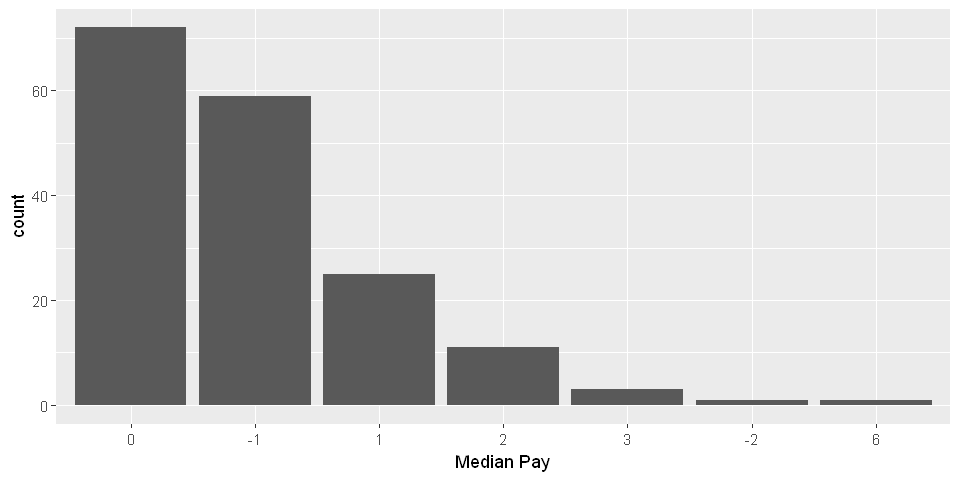

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

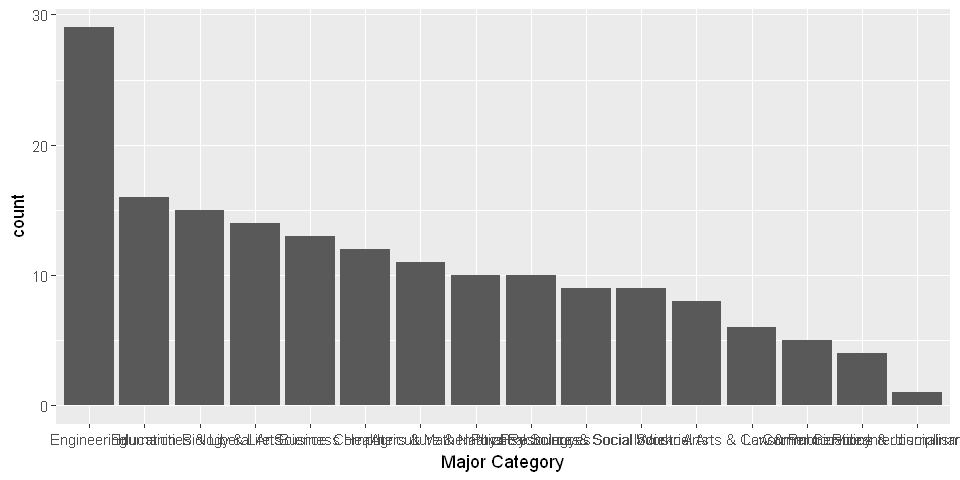

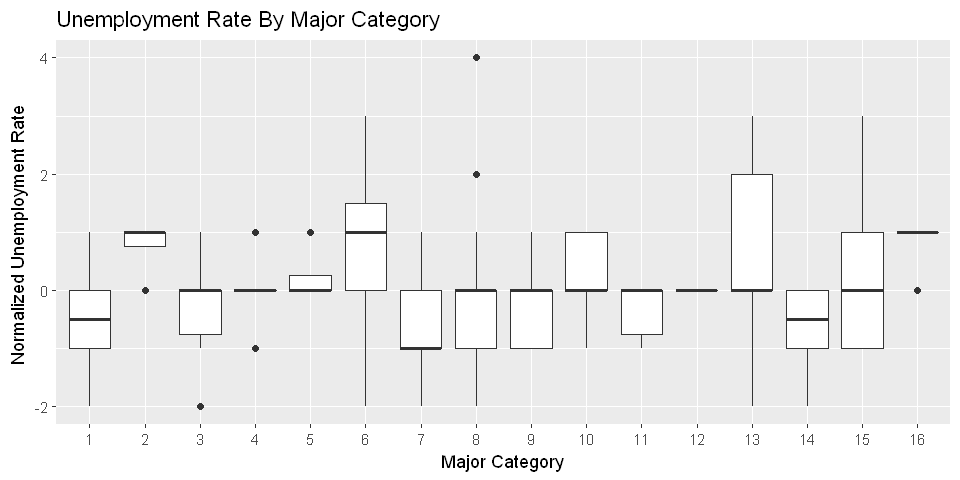

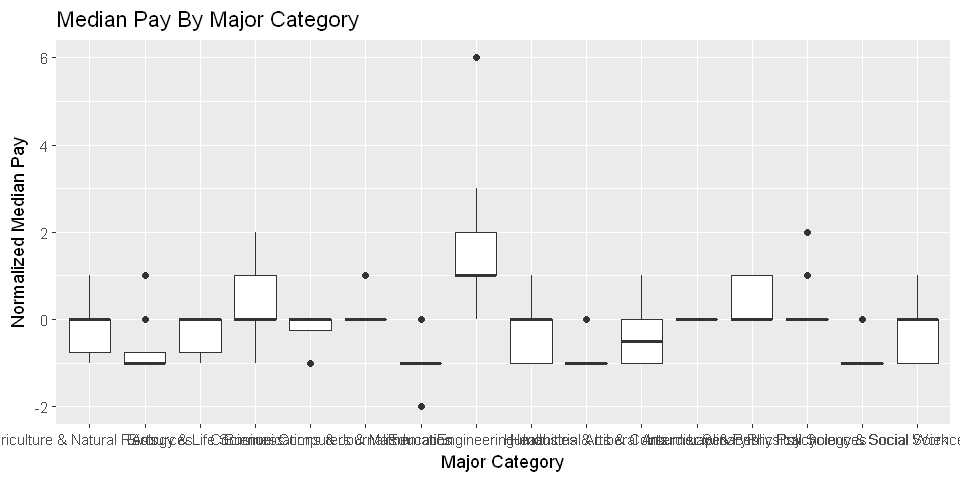

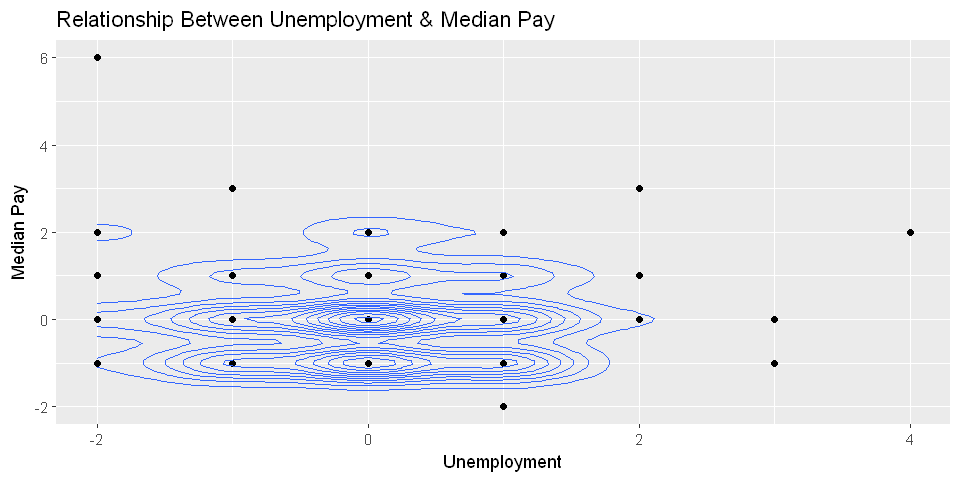

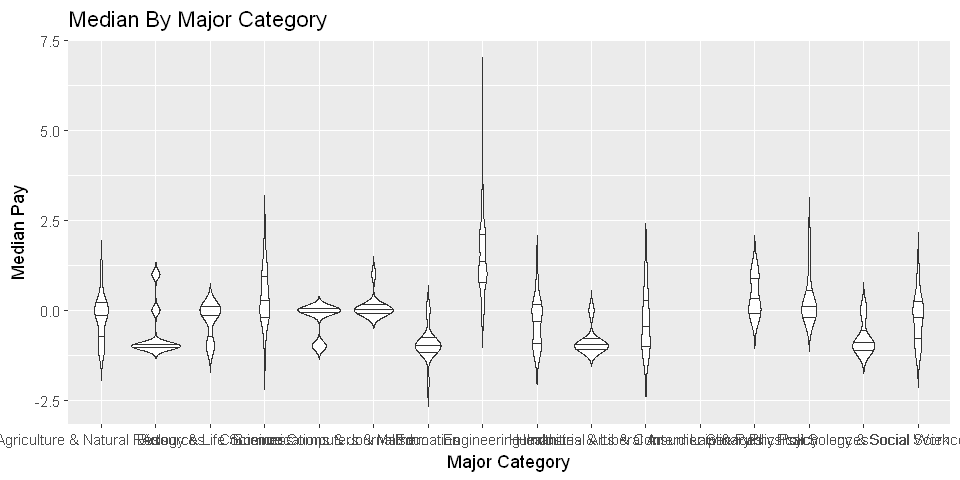

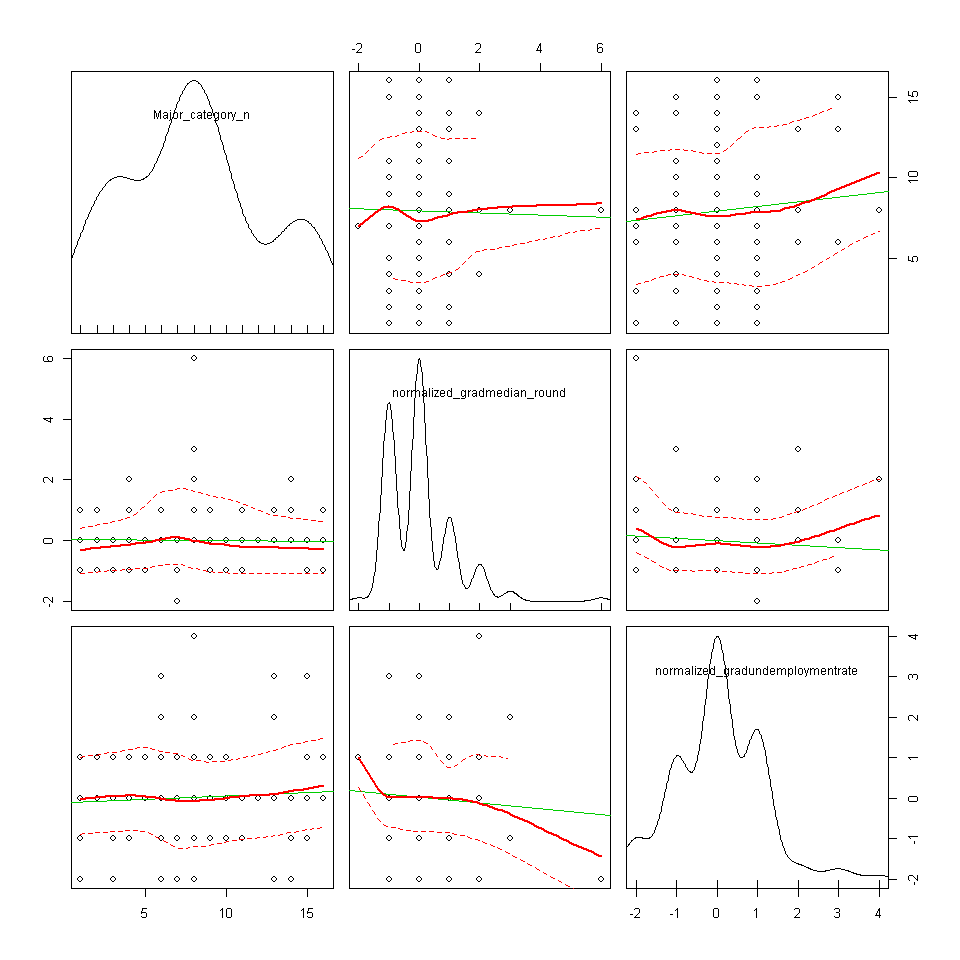

In [109]:
#Visualization
require(ggplot2)
# Bar plot
ggplot(recentgrads, aes(x=reorder(normalized_gradmedian_round,normalized_gradmedian_round, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Median Pay')
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Bar plot
ggplot(recentgrads, aes(x=reorder(Major_category,Major_category, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Major Category')
theme(axis.text.x = element_text(angle = 90, hjust = 1))

#Create boxplot to compare two variables.
ggplot(numeric_recentgrads, aes(x = factor(Major_category_n), y = normalized_gradundemploymentrate)) + geom_boxplot() + 
         xlab('Major Category') + ylab('Normalized Unemployment Rate ') + ggtitle('Unemployment Rate By Major Category')

#Create boxplot to compare two variables.
#Engineering s the top grosser as a category.
ggplot(recentgrads, aes(x = factor(Major_category), y = normalized_gradmedian_round)) + geom_boxplot() + 
  xlab('Major Category') + ylab('Normalized Median Pay') + ggtitle('Median Pay By Major Category')

#2D kernel density plot
ggplot(recentgrads, aes(normalized_gradundemploymentrate, normalized_gradmedian_round)) + geom_point() + 
  geom_density2d() +
  xlab('Unemployment') + ylab('Median Pay') +
  ggtitle('Relationship Between Unemployment & Median Pay')

# Violin Plot
ggplot(recentgrads, aes(x = factor(Major_category), y = normalized_gradmedian_round)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Major Category')  + ylab('Median Pay') + ggtitle('Median By Major Category')

#Scatter plot matrix
options(repr.plot.width=8, repr.plot.height=8)
require(car)
scatterplotMatrix(~ Major_category_n + normalized_gradmedian_round + normalized_gradundemploymentrate, data = recentgrads)

### Hypothesis Testing To Understand The Impact Of Median Pay & Unemployment.
I am now going to group data by 'Major Category' and gauge the impact of 'Median Pay'& 'Unemployment' using the following techniques.

I am basing this analysis on 95 % CI, wherein we will accept the hypothesis for an adjusted P of greater than 0.05.
 - ANOVA analysis.
    - A high Fvalue and an extreemely low p-value(<2e-16) will reject the hypothesis that median salary is same across major category.
    - A high Fvalue and a low p-value(0.00135) will reject the hypothesis that unemployment is same across major category.
    - One can also see an interesting relationship between unemployment and median salary, there is lower unemployment across major categories, however the salary structure is vastly different.
 - Tukey Analysis.
    - 98 out of 120 comparisons reject the hypothesis when comparing an median pay across major categories, this matches the extreemely low p-values from ANOVA analysis.
    - 14 out of 120 comparisons reject the hypothesis when comparing the unemployment across major categories, this matches the low p-value from ANOVA analysis.
        

In [110]:
#Stratifying the data.
#Group By Major Category
groupedbyMajorCategory = recentgrads %>% group_by(Major_category)

#Anova analysis for median pay per major category
aov_majcat_medianpay = aov(groupedbyMajorCategory$normalized_gradmedian_round ~ groupedbyMajorCategory$Major_category, data = groupedbyMajorCategory)
summary(aov_majcat_medianpay)

#Anova analysis for unemployment rate per major category
aov_majcat_unemploy = aov(groupedbyMajorCategory$normalized_gradundemploymentrate ~ groupedbyMajorCategory$Major_category, data = groupedbyMajorCategory)
summary(aov_majcat_unemploy)

#Tukey Analysis for median pay per major category
tukey_majcat_medianpay = TukeyHSD(aov_majcat_medianpay)  # Tukey's Range test:
df_tukey_medianpay <- data.frame(tukey_majcat_medianpay$`groupedbyMajorCategory$Major_category`)
df_tukey_medianpay[order(df_tukey_medianpay$p.adj),]
tukey_majcat_unemploy = TukeyHSD(aov_majcat_unemploy)  # Tukey's Range test:
df_tukey_unemploy <- data.frame((tukey_majcat_unemploy$`groupedbyMajorCategory$Major_category`))
df_tukey_unemploy[order(df_tukey_unemploy$p.adj),]


                                       Df Sum Sq Mean Sq F value Pr(>F)    
groupedbyMajorCategory$Major_category  15 111.67   7.445   13.94 <2e-16 ***
Residuals                             156  83.32   0.534                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                                       Df Sum Sq Mean Sq F value  Pr(>F)   
groupedbyMajorCategory$Major_category  15  37.92  2.5278   2.648 0.00135 **
Residuals                             156 148.94  0.9547                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

,diff,lwr,upr,p.adj
Engineering-Education,2.4892241,1.69652591,3.28192237,9.314771e-14
Humanities & Liberal Arts-Engineering,-2.4183908,-3.22793830,-1.60884331,1.393330e-13
Psychology & Social Work-Engineering,-2.3295019,-3.30075445,-1.35824938,4.217071e-12
Engineering-Biology & Life Science,1.8374384,1.00905417,2.66582267,1.519000e-10
Health-Engineering,-1.8850575,-2.75875866,-1.01135628,4.987585e-10
Engineering-Arts,2.1767241,1.16020048,3.19324780,6.841132e-10
Engineering-Agriculture & Natural Resources,1.7517241,0.81826798,2.68518030,1.010651e-07
Social Science-Engineering,-1.7739464,-2.74519890,-0.80269382,2.502877e-07
Industrial Arts & Consumer Services-Engineering,-1.8850575,-3.02667340,-0.74344154,5.299955e-06
Engineering-Computers & Mathematics,1.4608150,0.55946129,2.36216881,8.841642e-06


,diff,lwr,upr,p.adj
Social Science-Education,1.5138889,0.09590716,2.93187062,0.02396127
Social Science-Physical Sciences,1.5888889,0.02524654,3.15253123,0.04219603
Education-Computers & Mathematics,-1.3522727,-2.68520298,-0.01934247,0.04293470
Physical Sciences-Computers & Mathematics,-1.4272727,-2.91421868,0.05967322,0.07495686
Education-Arts,-1.3750000,-2.84860984,0.09860984,0.09685212
Physical Sciences-Arts,-1.4500000,-3.06425870,0.16425870,0.13280729
Social Science-Agriculture & Natural Resources,1.3888889,-0.17475346,2.95253123,0.14485982
Humanities & Liberal Arts-Education,1.0250000,-0.19808631,2.24808631,0.21805012
Computers & Mathematics-Agriculture & Natural Resources,1.2272727,-0.25967322,2.71421868,0.24001633
Physical Sciences-Humanities & Liberal Arts,-1.1000000,-2.48933268,0.28933268,0.30499654


## Linear Regression Model
I am now going to create linear regression models based on three techniques to predict the median pay and unemployment rate.
- Linear regression using using lm function.
 - Model used to predict 'Median Pay' has returned an adjusted r-squared value of 0.7596. This high value might be due to overfitting, so we would be using step-wise and regularization techniques to come with a better model.
  - Model used to predict 'Unemployment Rate' has returned an adjusted r-squared value of 0.1529, this value is almost equal to 0 and would point to us that this data cannot be explained by this model and we might not be able to create a model based on all the supplied features.
- Step wise regression based on the output of lm to resolve any overfitting issues.
 - After removing 7 features this model **<span style="color:red">does show a strong influence of major code over median pay</span>**, once can infer this by looking at a low P value of 0.00556 on this feature.
 - After removing 12 features we still have a very low adjusted r-squared value(0.1806), further we can also validate that **<span style="color:red">major or major category have no influence on unemployment rate with the provided data</span>**.
- Regularisation with pseudo inverse (using "Single value decomposition")
 - A high Adjusted R^2 = 0.732465270655342 on median pay model validates the previous anlysis of lm and step wise regression.
 - **<span style="color:red">A negative Adjusted R^2 = -1.01733225057428 on an unemployment rate model confirms the results from lm and step wise algorithms</span>**.
- Regularization with Elastic Net Regression.
 - An **<span style="color:red">Adjusted R^2 = 0.921642138382149 on median pay validates elastic net with the most robust model</span>**.
 - An **<span style="color:red">Adjusted R^2 = 0.027242754675643 on unemployment data again validates that a valid model cannot be created on this data</span>**.


Call:
lm(formula = numeric_recentgrads$normalized_gradmedian_round ~ 
    . - Median - Rank - 1 - normalized_gradmedian - normalized_gradundemploymentrate - 
        normalized_gradunemployednum - normalized_grademployednum, 
    data = numeric_recentgrads)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46611 -0.39330 -0.06283  0.27975  1.39795 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
Major_code           -5.804e-05  2.676e-05  -2.169   0.0316 *  
Total                 7.821e-06  1.854e-05   0.422   0.6738    
Sample_size           8.473e-04  5.933e-04   1.428   0.1553    
Men                  -6.844e-06  2.669e-06  -2.564   0.0113 *  
Women                 5.648e-06  2.230e-06   2.533   0.0123 *  
ShareWomen           -2.014e+00  1.792e-01 -11.237  < 2e-16 ***
Employed             -8.256e-05  5.790e-05  -1.426   0.1559    
Full_time             1.367e-05  5.639e-05   0.242   0.8088    
Part_time             2.341e-05  6.213e-05   0

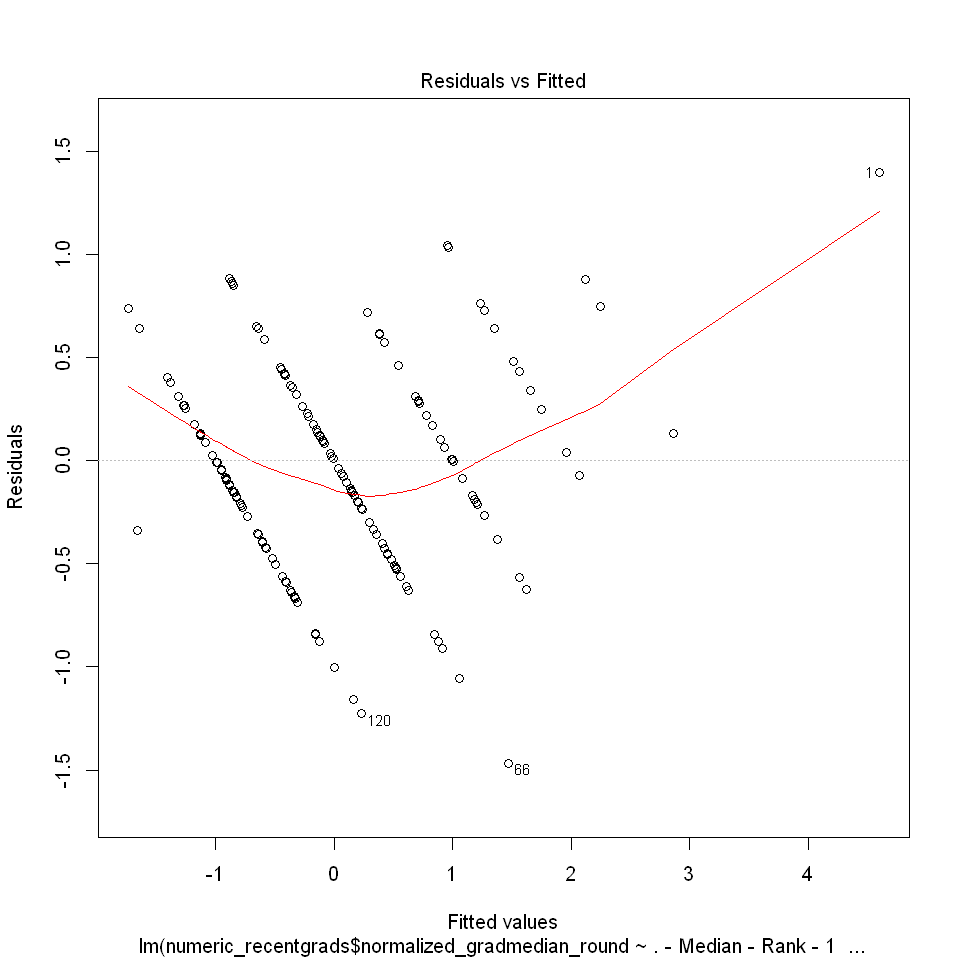

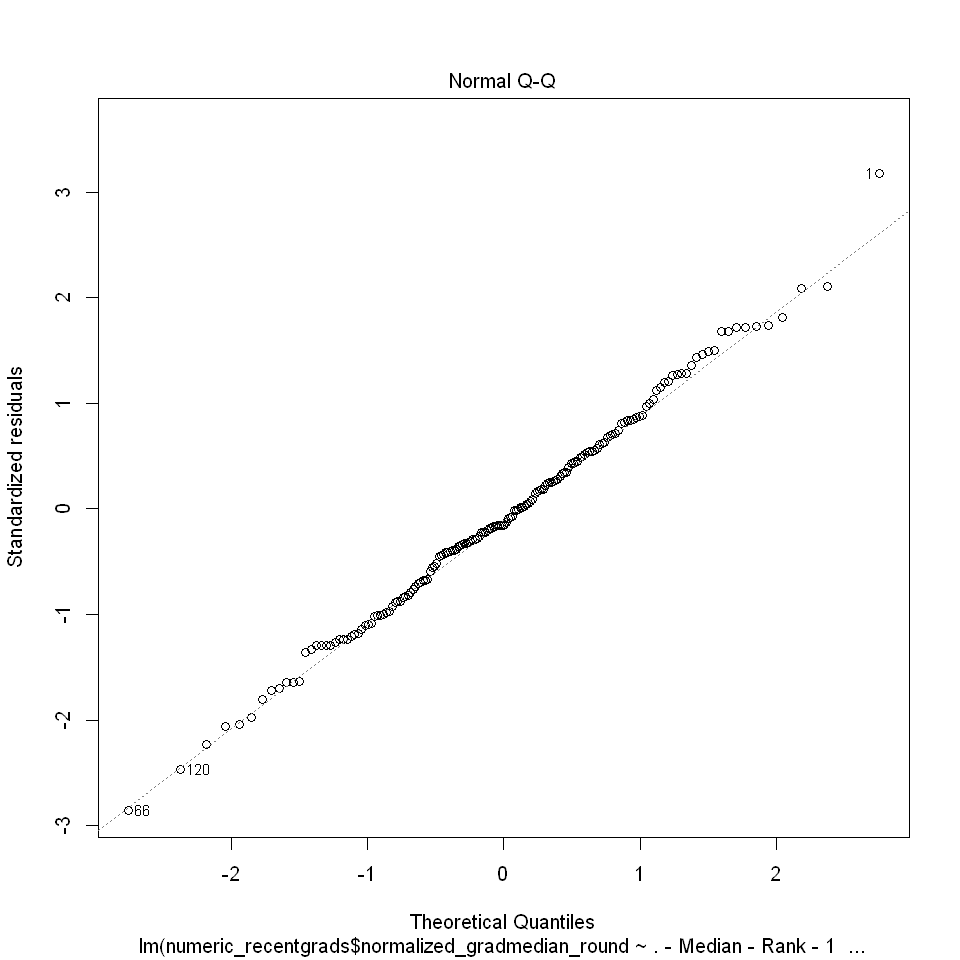

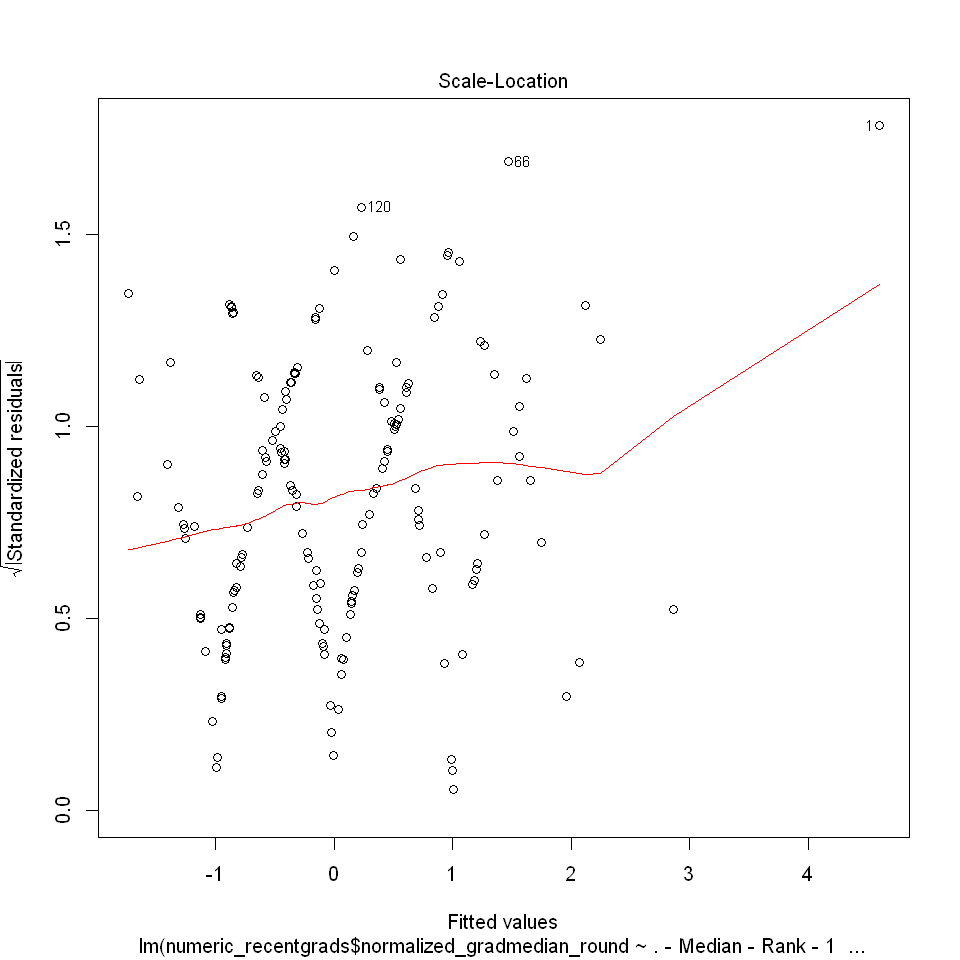


Call:
lm(formula = numeric_recentgrads$normalized_gradundemploymentrate ~ 
    . - Unemployment_rate - Rank - 1 - normalized_gradmedian - 
        normalized_gradundemploymentrate - normalized_gradunemployednum - 
        normalized_grademployednum - normalized_gradmedian_round, 
    data = numeric_recentgrads)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3583 -0.5452  0.0455  0.4326  3.6008 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
Major_code            4.543e-05  4.849e-05   0.937   0.3502    
Total                 4.977e-05  3.403e-05   1.463   0.1456    
Sample_size           1.323e-03  1.084e-03   1.221   0.2239    
Men                   4.139e-06  4.850e-06   0.853   0.3948    
Women                -1.370e-06  4.093e-06  -0.335   0.7382    
ShareWomen           -1.097e-01  3.129e-01  -0.351   0.7263    
Employed              1.508e-04  1.061e-04   1.422   0.1571    
Full_time            -1.840e-04  1.032e-04  -1.783   0.0766 .  
P

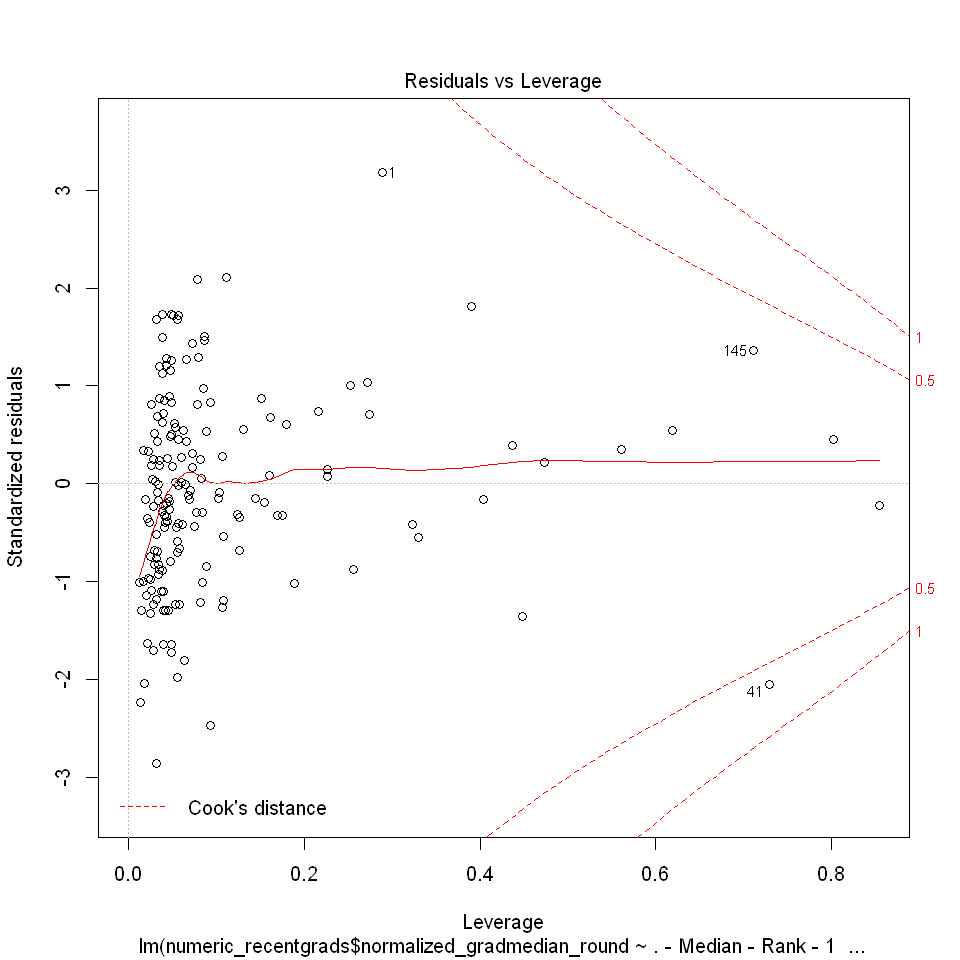

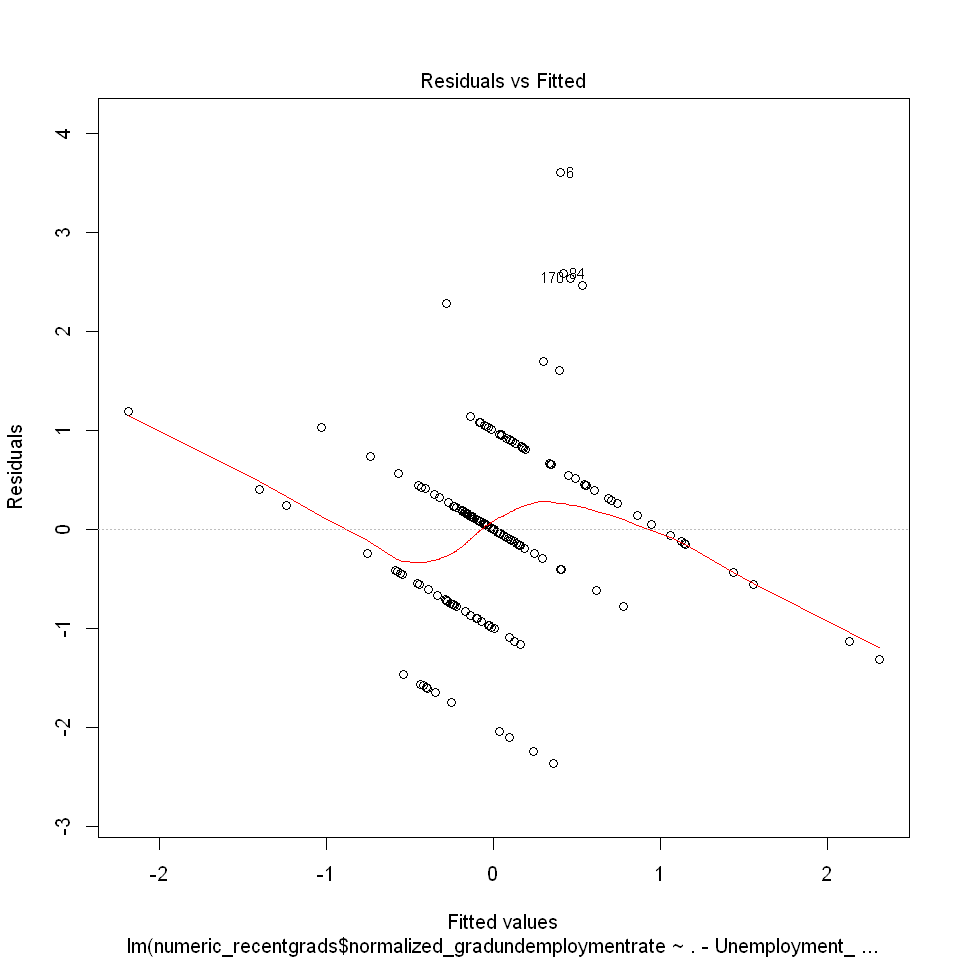

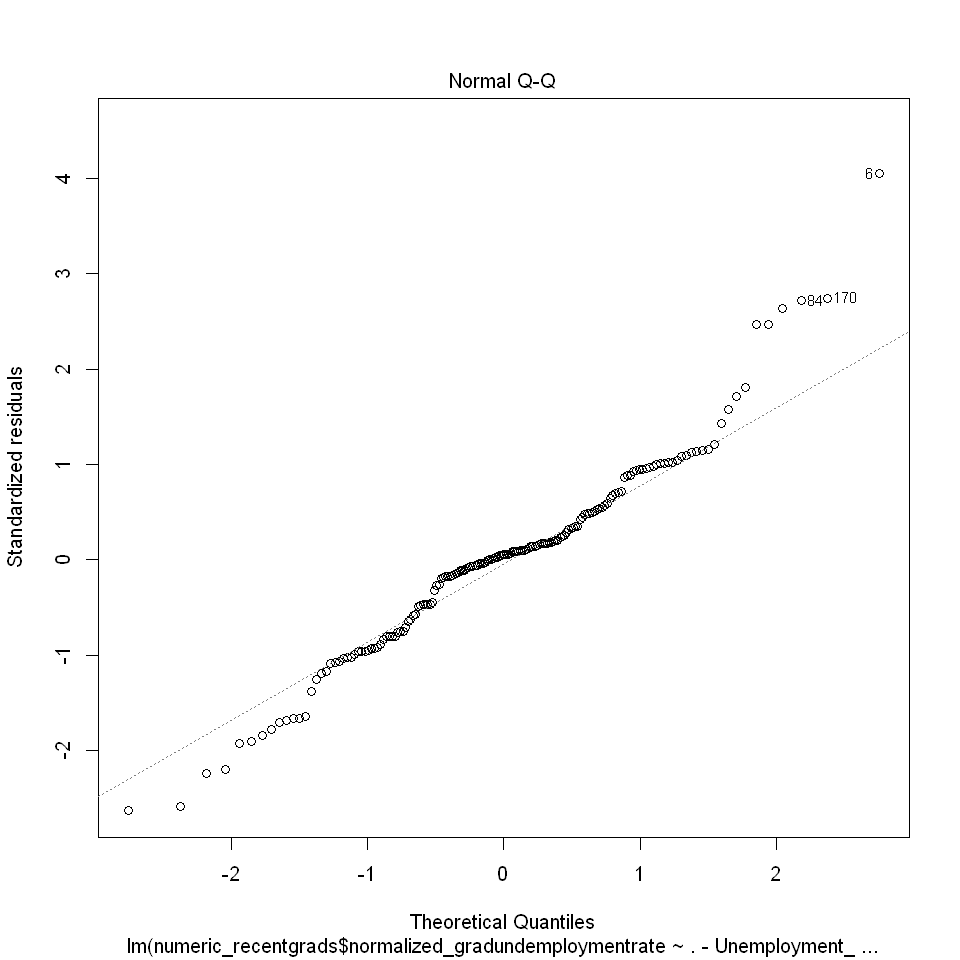

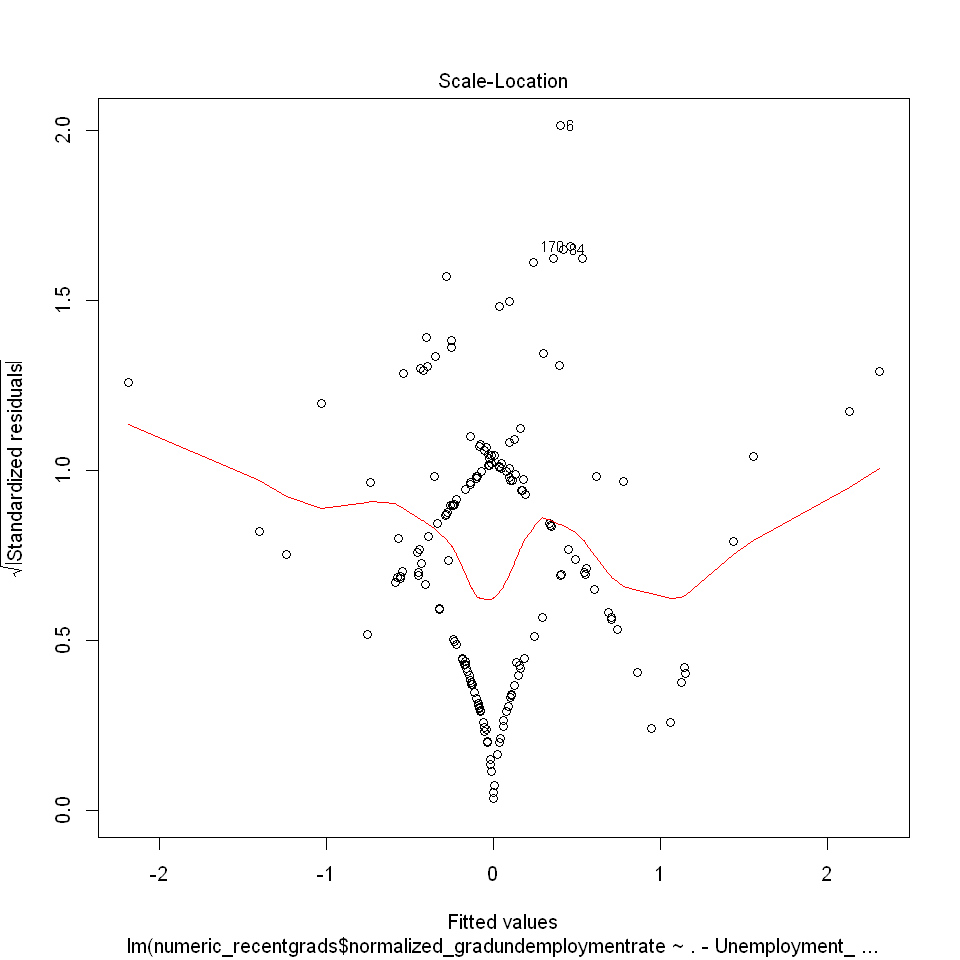

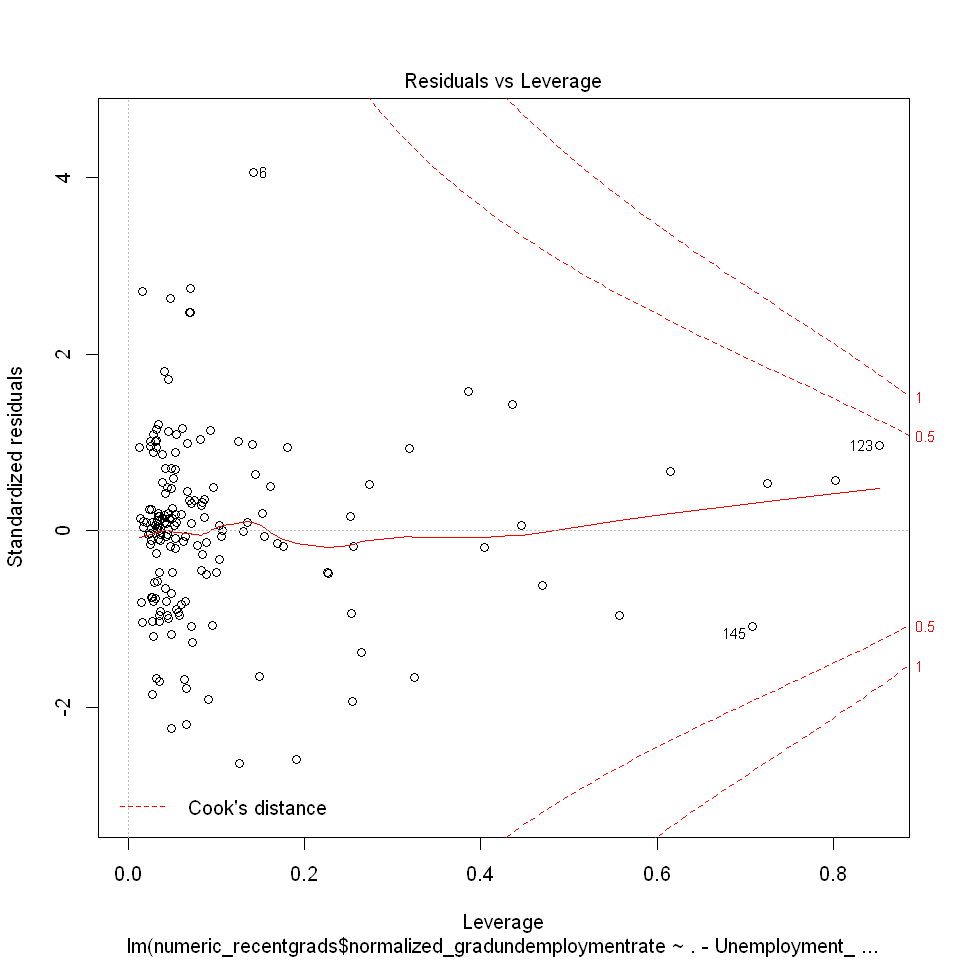

In [111]:
#Create a model on median pay based on linear regression.
lm.medianpay = lm(numeric_recentgrads$normalized_gradmedian_round ~ . - Median - Rank - 1 -normalized_gradmedian - normalized_gradundemploymentrate - normalized_gradunemployednum - normalized_grademployednum, data = numeric_recentgrads)
summary(lm.medianpay)
plot(lm.medianpay)

#Create a model on unemployment based on linear regression.
lm.unemployment = lm(numeric_recentgrads$normalized_gradundemploymentrate ~ . - Unemployment_rate - Rank - 1 -normalized_gradmedian - normalized_gradundemploymentrate - normalized_gradunemployednum - normalized_grademployednum -normalized_gradmedian_round, data = numeric_recentgrads)
summary(lm.unemployment)
plot(lm.unemployment)

Start:  AIC=-206.59
numeric_recentgrads$normalized_gradmedian_round ~ (Rank + Major_code + 
    Total + Sample_size + Men + Women + ShareWomen + Employed + 
    Full_time + Part_time + Full_time_year_round + Unemployed + 
    Unemployment_rate + Median + P25th + P75th + College_jobs + 
    Non_college_jobs + Low_wage_jobs + normalized_gradmedian + 
    normalized_gradundemploymentrate + normalized_gradunemployednum + 
    normalized_grademployednum + Major_category_n) - Median - 
    Rank - 1 - normalized_gradmedian - normalized_gradundemploymentrate - 
    normalized_gradunemployednum - normalized_grademployednum

                       Df Sum of Sq    RSS     AIC
- Low_wage_jobs         1     0.005 41.980 -208.57
- Full_time             1     0.016 41.991 -208.53
- Part_time             1     0.039 42.013 -208.44
- Total                 1     0.048 42.023 -208.40
- Non_college_jobs      1     0.096 42.071 -208.20
- Major_category_n      1     0.217 42.191 -207.71
- Full_time_year_rou

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,154,41.97463,-206.5938
- Low_wage_jobs,1,0.004991476,155,41.97962,-208.5734
- Full_time,1,0.012239135,156,41.99186,-210.5232
- Part_time,1,0.025190289,157,42.01705,-212.4201
- Non_college_jobs,1,0.116662861,158,42.13371,-213.9432
- Total,1,0.259724471,159,42.39344,-214.8862
- Sample_size,1,0.291684803,160,42.68512,-215.7068
- Major_category_n,1,0.448266029,161,43.13339,-215.9099



Call:
lm(formula = numeric_recentgrads$normalized_gradmedian_round ~ 
    Major_code + Men + Women + ShareWomen + Employed + Full_time_year_round + 
        Unemployed + Unemployment_rate + P25th + P75th + College_jobs - 
        1, data = numeric_recentgrads)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48297 -0.40016 -0.02758  0.24466  1.45937 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
Major_code           -6.677e-05  2.375e-05  -2.811  0.00556 ** 
Men                  -6.017e-06  2.350e-06  -2.561  0.01137 *  
Women                 4.963e-06  2.055e-06   2.415  0.01684 *  
ShareWomen           -2.036e+00  1.707e-01 -11.926  < 2e-16 ***
Employed             -5.347e-05  1.250e-05  -4.279 3.22e-05 ***
Full_time_year_round  5.563e-05  1.298e-05   4.286 3.12e-05 ***
Unemployed            1.517e-04  5.604e-05   2.707  0.00753 ** 
Unemployment_rate    -5.843e+00  1.393e+00  -4.196 4.49e-05 ***
P25th                 2.669e-05  6.395e-06 

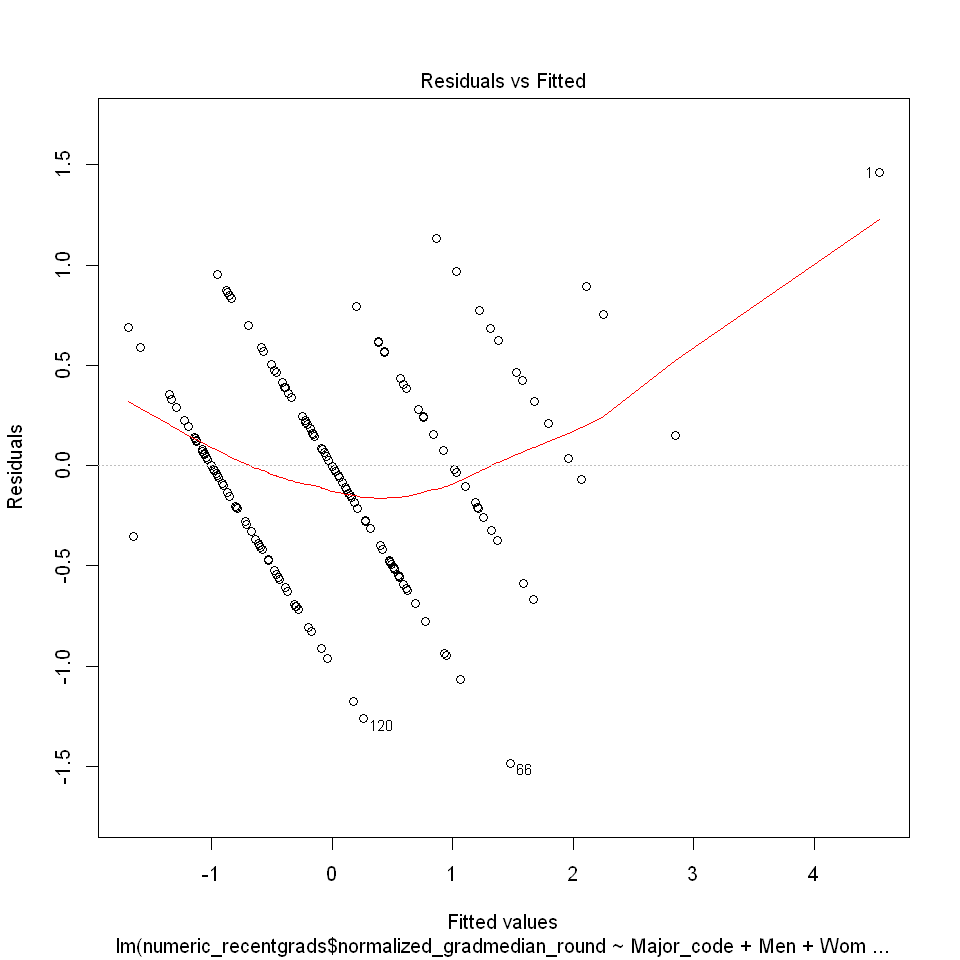

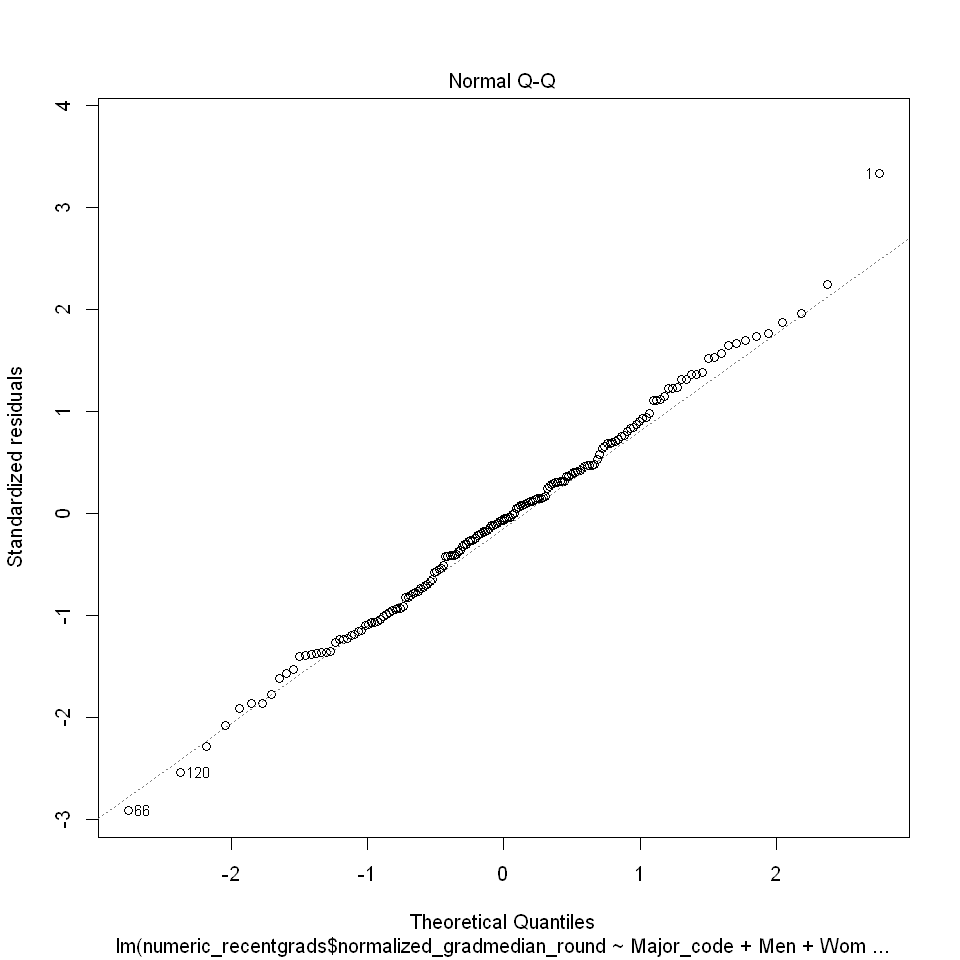

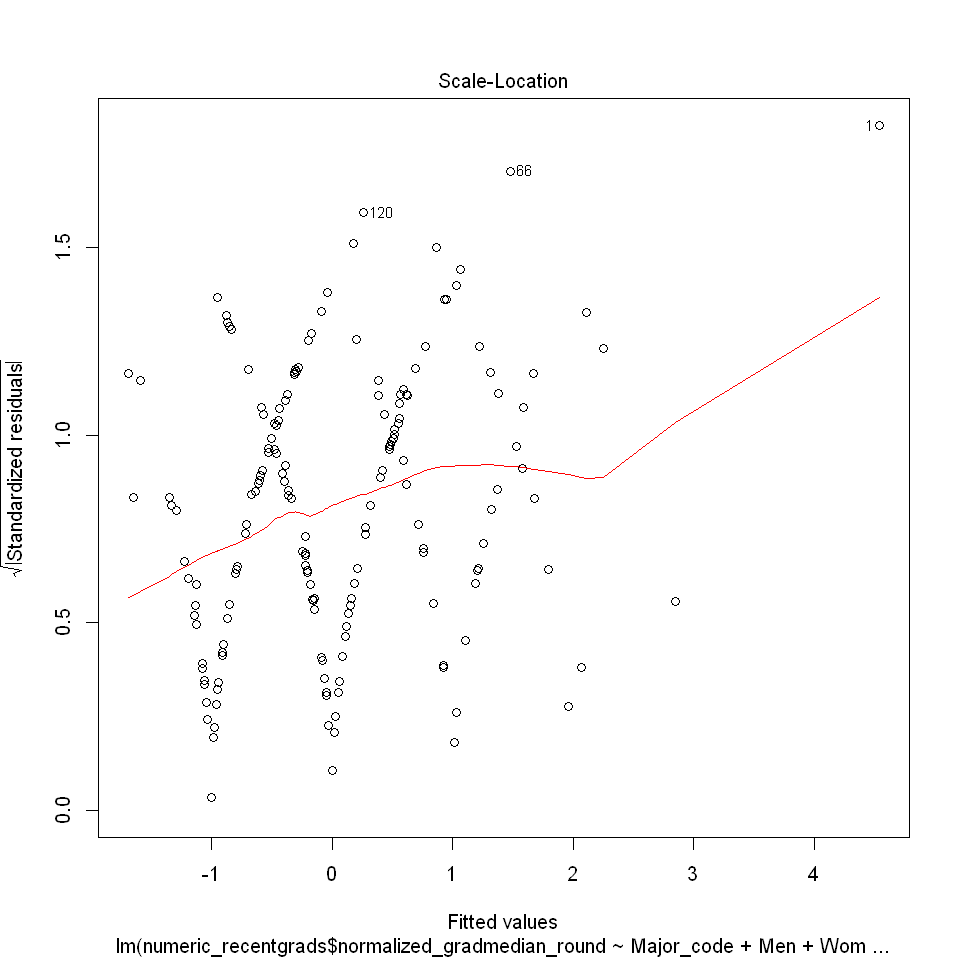

Start:  AIC=2.83
numeric_recentgrads$normalized_gradundemploymentrate ~ (Rank + 
    Major_code + Total + Sample_size + Men + Women + ShareWomen + 
    Employed + Full_time + Part_time + Full_time_year_round + 
    Unemployed + Unemployment_rate + Median + P25th + P75th + 
    College_jobs + Non_college_jobs + Low_wage_jobs + normalized_gradmedian_round + 
    normalized_gradmedian + normalized_gradunemployednum + normalized_grademployednum + 
    Major_category_n) - Unemployment_rate - Rank - 1 - normalized_gradmedian - 
    normalized_gradundemploymentrate - normalized_gradunemployednum - 
    normalized_grademployednum - normalized_gradmedian_round

                       Df Sum of Sq    RSS     AIC
- Major_category_n      1    0.0004 141.83  0.8319
- Non_college_jobs      1    0.0048 141.84  0.8372
- Low_wage_jobs         1    0.0358 141.87  0.8748
- Women                 1    0.1032 141.94  0.9565
- ShareWomen            1    0.1132 141.95  0.9687
- College_jobs          1    0.52

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,154,141.8335,2.8313920
- Major_category_n,1,0.0004196396,155,141.8339,0.8319009
- Non_college_jobs,1,0.0044565506,156,141.8384,-1.1626948
- Women,1,0.1072851734,157,141.9456,-3.0326448
- Low_wage_jobs,1,0.1012884644,158,142.0469,-4.9099542
- ShareWomen,1,0.2864454125,159,142.3334,-6.5634560
- P25th,1,0.6415676146,160,142.9749,-7.7899082
- Major_code,1,0.9504915524,161,143.9254,-8.6502434
- Full_time_year_round,1,0.8961728845,162,144.8216,-9.5825807
- Employed,1,0.8193430176,163,145.6410,-10.6122155



Call:
lm(formula = numeric_recentgrads$normalized_gradundemploymentrate ~ 
    Full_time + Part_time + Unemployed + Median + P75th + College_jobs - 
        1, data = numeric_recentgrads)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5130 -0.6756  0.0509  0.5622  3.4944 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
Full_time    -3.885e-05  7.469e-06  -5.201 5.77e-07 ***
Part_time    -6.769e-05  2.044e-05  -3.312  0.00114 ** 
Unemployed    6.031e-04  1.048e-04   5.753 4.13e-08 ***
Median       -2.547e-05  1.438e-05  -1.771  0.07846 .  
P75th         1.961e-05  1.119e-05   1.753  0.08152 .  
College_jobs  1.445e-05  7.355e-06   1.965  0.05106 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9439 on 166 degrees of freedom
Multiple R-squared:  0.2092,	Adjusted R-squared:  0.1806 
F-statistic: 7.318 on 6 and 166 DF,  p-value: 5.932e-07


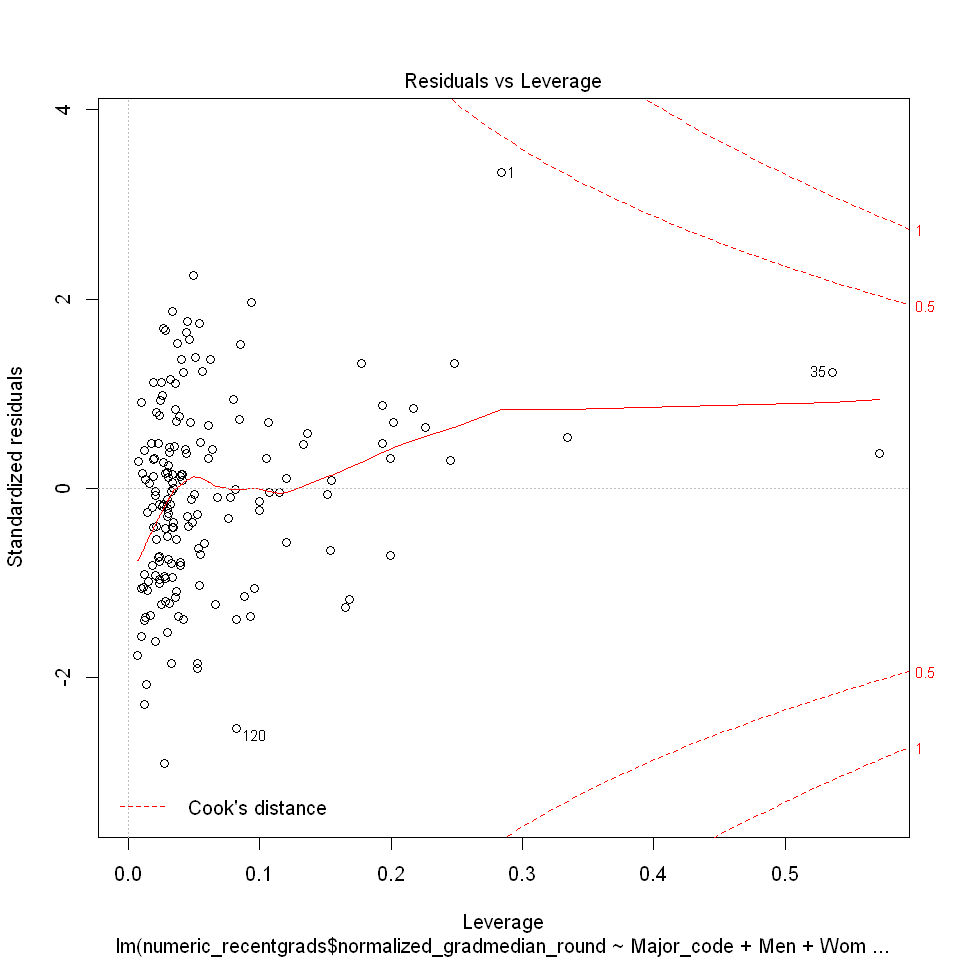

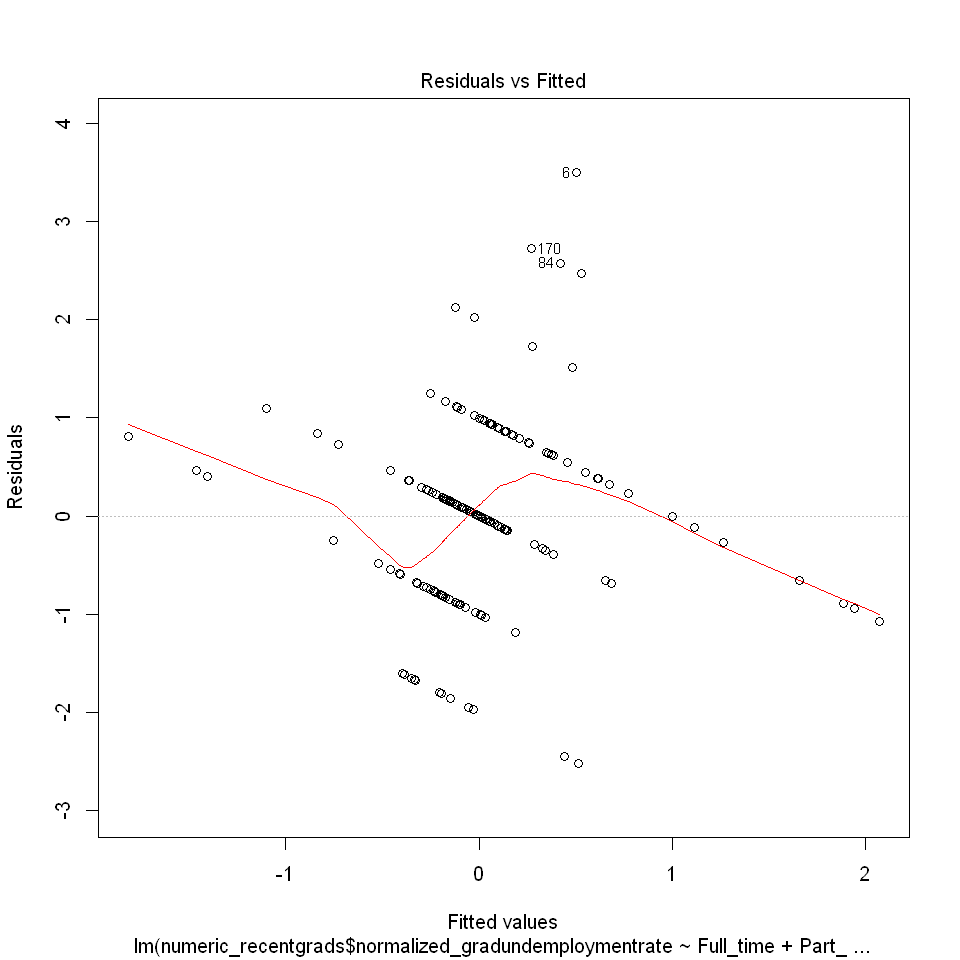

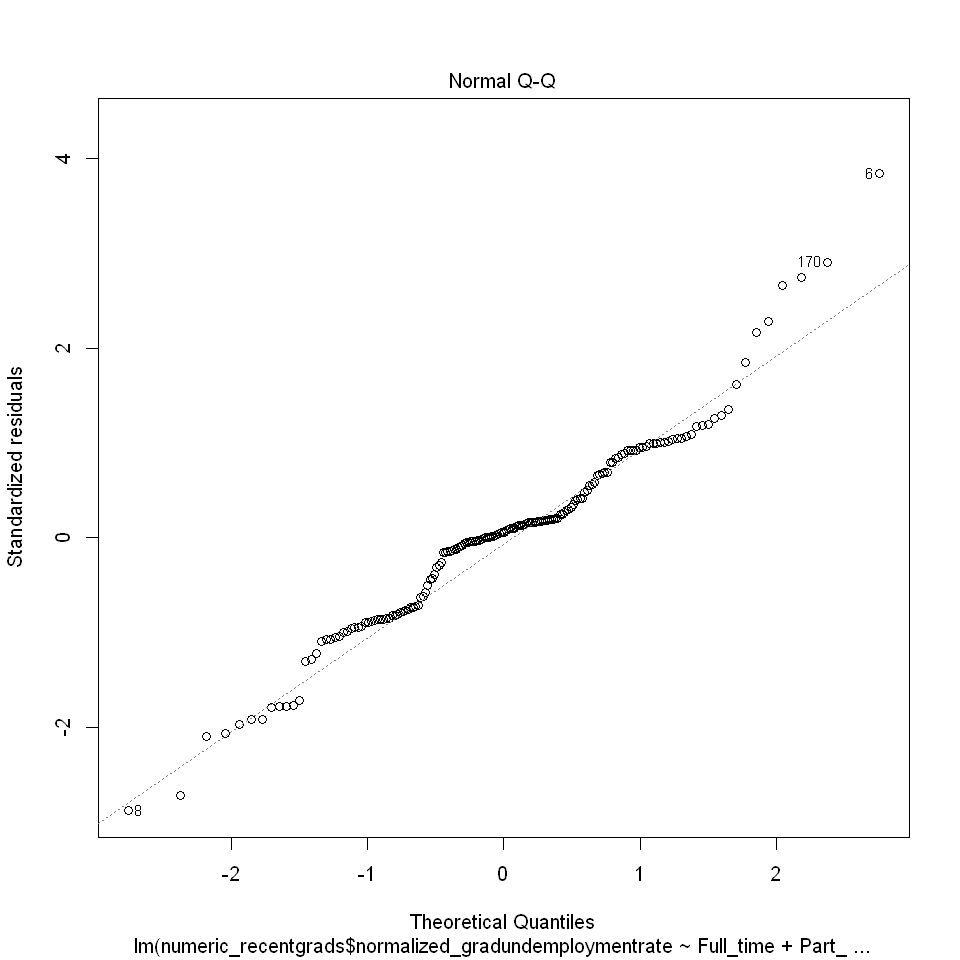

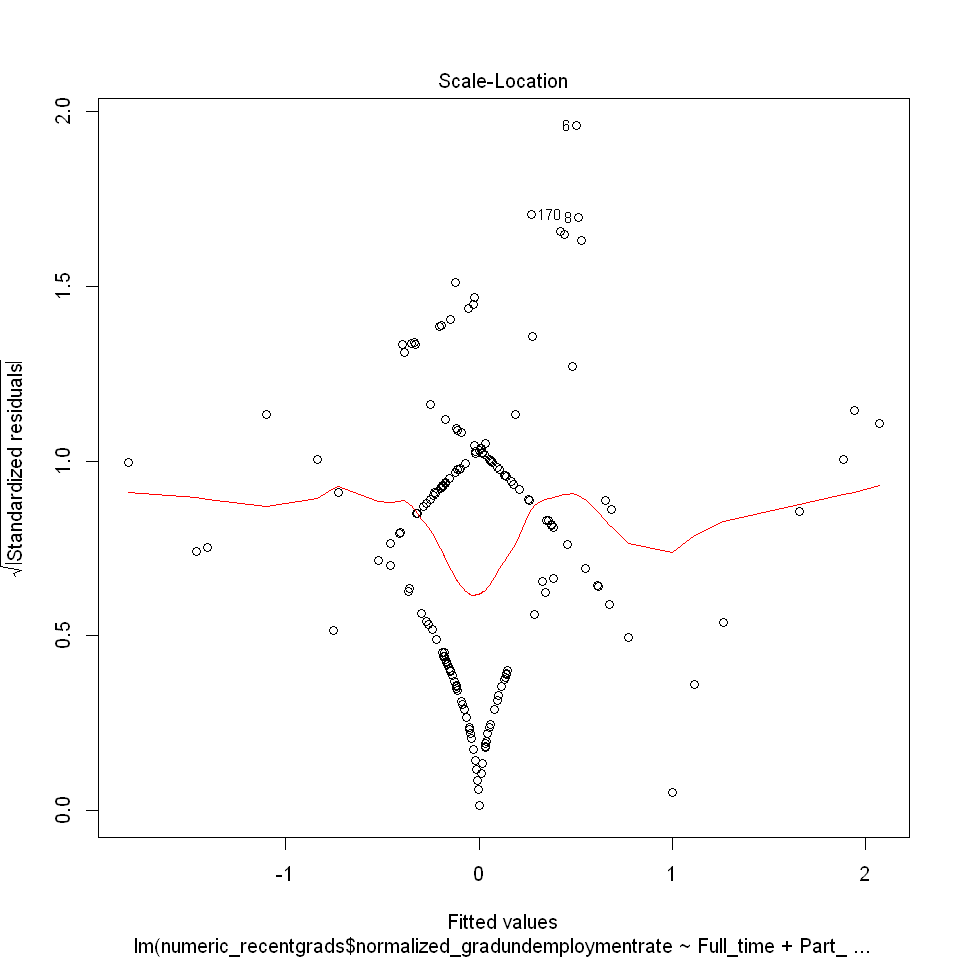

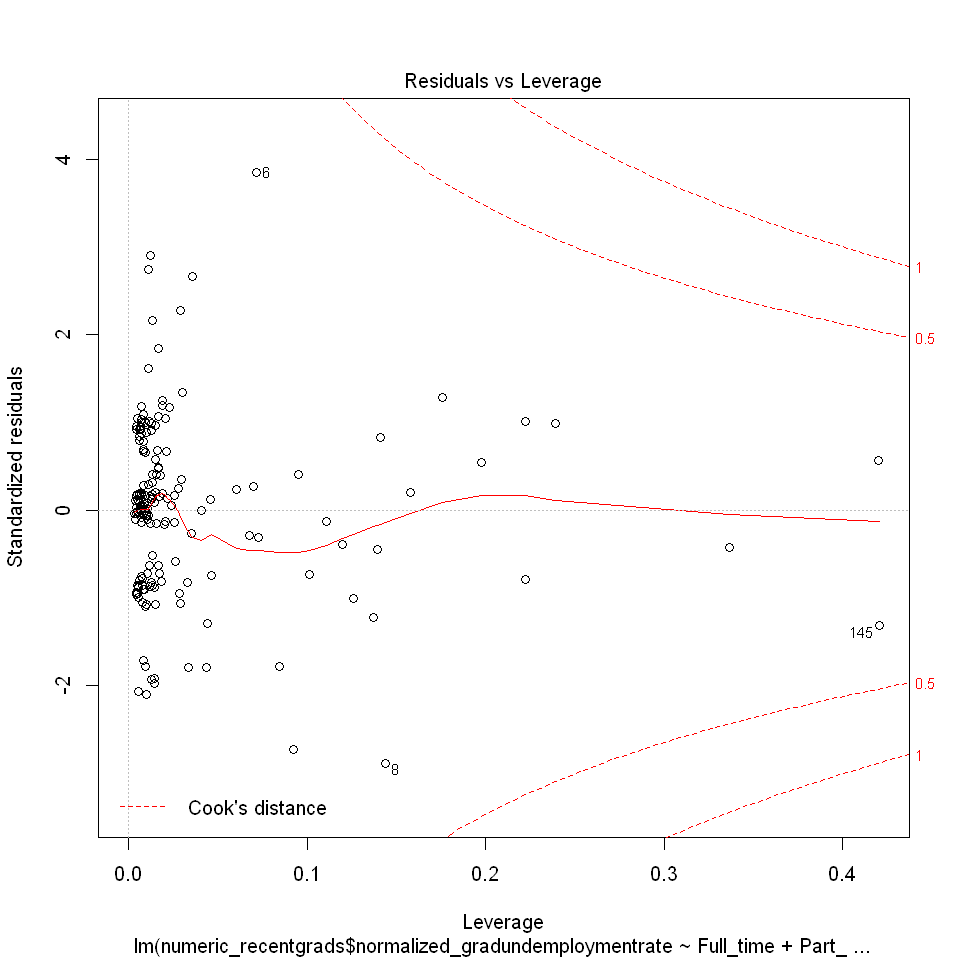

In [112]:
#Apply Step Wise Regression on median pay
library(MASS)
lm.step.medianpay = stepAIC(lm.medianpay, direction = 'both')
lm.step.medianpay$anova # ANOVA of the result 
summary(lm.step.medianpay) # Summary of the best model
plot(lm.step.medianpay)

#Apply Step Wise Regression on unemployment rate
library(MASS)
lm.step.unemploymentrate = stepAIC(lm.unemployment, direction = 'both')
lm.step.unemploymentrate$anova # ANOVA of the result 
summary(lm.step.unemploymentrate) # Summary of the best model
plot(lm.step.unemploymentrate)

,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Major_category_n
1,2419,2339,36,2057,282,0.1205643,1976,1849,270,1207,37,0.01838053,95000,125000,1534,364,193,8
2,2416,756,7,679,77,0.1018519,640,556,170,388,85,0.11724138,55000,90000,350,257,50,8
3,2415,856,3,725,131,0.1530374,648,558,133,340,16,0.02409639,50000,105000,456,176,0,8
4,2417,1258,16,1123,135,0.1073132,758,1069,150,692,40,0.05012531,43000,80000,529,102,0,8
5,2405,32260,289,21239,11021,0.3416305,25694,23170,5180,16697,1672,0.06109771,50000,75000,18314,4440,972,8
6,2418,2573,17,2200,373,0.1449670,1857,2038,264,1449,400,0.17722641,50000,102000,1142,657,244,8


,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Major_category_n
Major_code,3.079659e+09,29973626098,2.760716e+08,11461305248,15693774849,3.540256e+05,23892563901,19952112527,6.758350e+09,15198153599,1.888603e+09,4.688495e+04,19205569050,34002131800,8525784900,10521784095,3.044416e+09,5.701127e+06
Total,2.997363e+10,955775842959,8.784944e+09,193122407187,367643960126,3.675965e+06,761480846593,638553878575,2.115446e+11,487990775265,6.006105e+10,4.884556e+05,192633591200,334831590400,269367304251,334044103165,9.695453e+10,5.393426e+07
Sample_size,2.760716e+08,8784943877,8.770298e+07,1546417333,2881642625,3.251974e+04,7119695207,6064486044,1.829130e+09,4688075307,5.504370e+08,4.393835e+03,1792592550,3083620900,2348748393,3134679600,8.732037e+08,4.648990e+05
Men,1.146131e+10,193122407187,1.546417e+09,183342919903,197974711983,1.377903e+06,147078981882,123015706180,4.446248e+10,91715071942,1.224141e+10,2.173000e+05,86836382150,150492674500,57667346437,59753845021,1.829900e+10,2.516651e+07
Women,1.569377e+10,367643960126,2.881643e+09,197974711983,376474034225,2.518526e+06,287215131702,231029604470,9.169616e+10,172439173553,2.216788e+10,2.762818e+05,107264910550,182914197100,139789911859,112002523084,3.578378e+10,3.411094e+07
ShareWomen,3.540256e+05,3675965,3.251974e+04,1377903,2518526,5.619864e+01,2933015,2409202,8.647509e+05,1811970,2.230595e+05,6.130019e+00,2457979,4310681,1241658,1240289,3.699042e+05,7.223152e+02


[1] 18 18

[1] 2.899468e+12 4.921493e+11 2.754436e+11 6.376618e+10 2.195812e+10
 [6] 1.210274e+10 5.060928e+09 2.741434e+09 8.064207e+08 5.849432e+08
[11] 1.448383e+08 1.284400e+08 9.508623e+07 2.392718e+07 8.491381e+05
[16] 2.295621e+03 9.424635e+00 1.334517e-01

[1]  18 172

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


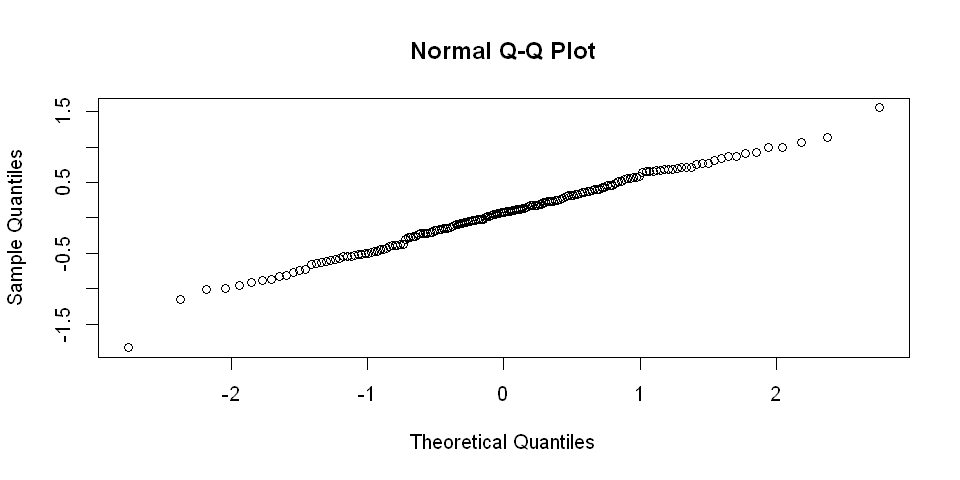

`geom_smooth()` using method = 'loess'


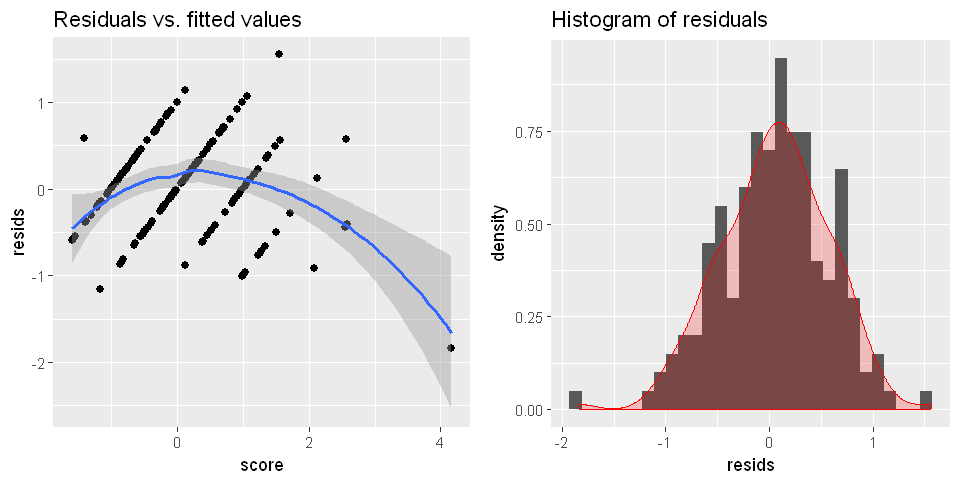

SSE = 148.317807868012 
SSR = 46.6763781785001 
SST = 194.994186046512 
RMSE = 0.872457693341244 
Adjusted R^2 = 0.732465270655342 


,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,Major_category_n
1,2419,2339,36,2057,282,0.1205643,1976,1849,270,1207,37,110000,95000,125000,1534,364,193,6,8
2,2416,756,7,679,77,0.1018519,640,556,170,388,85,75000,55000,90000,350,257,50,3,8
3,2415,856,3,725,131,0.1530374,648,558,133,340,16,73000,50000,105000,456,176,0,3,8
4,2417,1258,16,1123,135,0.1073132,758,1069,150,692,40,70000,43000,80000,529,102,0,3,8
5,2405,32260,289,21239,11021,0.3416305,25694,23170,5180,16697,1672,65000,50000,75000,18314,4440,972,2,8
6,2418,2573,17,2200,373,0.1449670,1857,2038,264,1449,400,65000,50000,102000,1142,657,244,2,8


,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,Major_category_n
Major_code,3.079659e+09,29973626098,2.760716e+08,11461305248,15693774849,3.540256e+05,23892563901,19952112527,6.758350e+09,15198153599,1.888603e+09,26211659500,19205569050,34002131800,8525784900,10521784095,3.044416e+09,-42103.0000,5.701127e+06
Total,2.997363e+10,955775842959,8.784944e+09,193122407187,367643960126,3.675965e+06,761480846593,638553878575,2.115446e+11,487990775265,6.006105e+10,258331596100,192633591200,334831590400,269367304251,334044103165,9.695453e+10,-1335773.0000,5.393426e+07
Sample_size,2.760716e+08,8784943877,8.770298e+07,1546417333,2881642625,3.251974e+04,7119695207,6064486044,1.829130e+09,4688075307,5.504370e+08,2390807300,1792592550,3083620900,2348748393,3134679600,8.732037e+08,-5718.0000,4.648990e+05
Men,1.146131e+10,193122407187,1.546417e+09,183342919903,197974711983,1.377903e+06,147078981882,123015706180,4.446248e+10,91715071942,1.224141e+10,116737436000,86836382150,150492674500,57667346437,59753845021,1.829900e+10,122770.0000,2.516651e+07
Women,1.569377e+10,367643960126,2.881643e+09,197974711983,376474034225,2.518526e+06,287215131702,231029604470,9.169616e+10,172439173553,2.216788e+10,141475960100,107264910550,182914197100,139789911859,112002523084,3.578378e+10,-1458543.0000,3.411094e+07
ShareWomen,3.540256e+05,3675965,3.251974e+04,1377903,2518526,5.619864e+01,2933015,2409202,8.647509e+05,1811970,2.230595e+05,3332925,2457979,4310681,1241658,1240289,3.699042e+05,-25.3864,7.223152e+02


[1] 19 19

[1] 3.016872e+12 6.626008e+11 2.857967e+11 6.396308e+10 2.196047e+10
 [6] 1.210989e+10 5.581015e+09 2.743852e+09 1.000275e+09 8.040851e+08
[11] 5.791260e+08 1.446886e+08 1.283338e+08 9.506388e+07 2.392483e+07
[16] 8.491112e+05 2.281392e+03 9.569353e+01 4.289356e+00

[1]  19 172

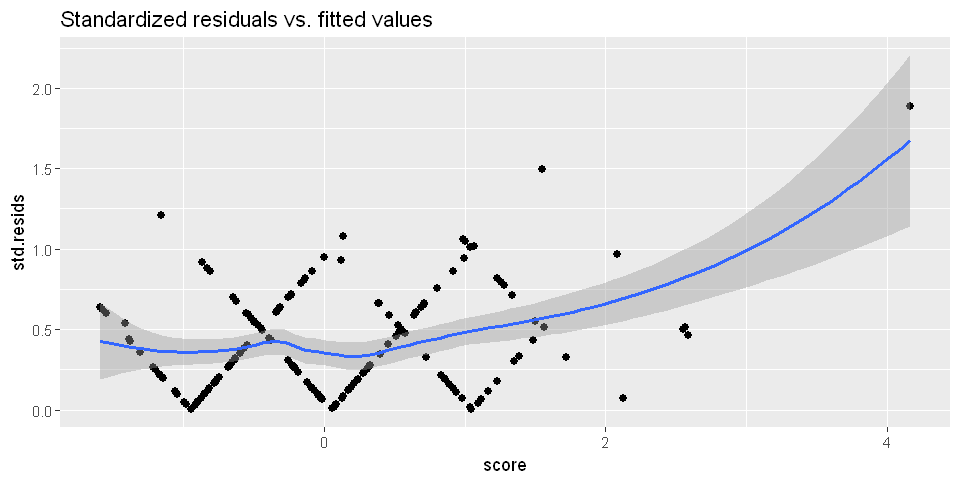

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


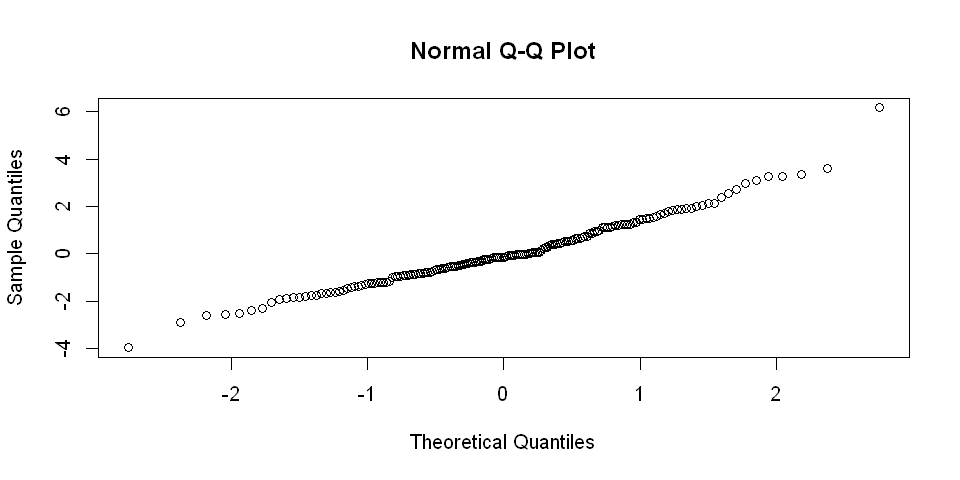

`geom_smooth()` using method = 'loess'


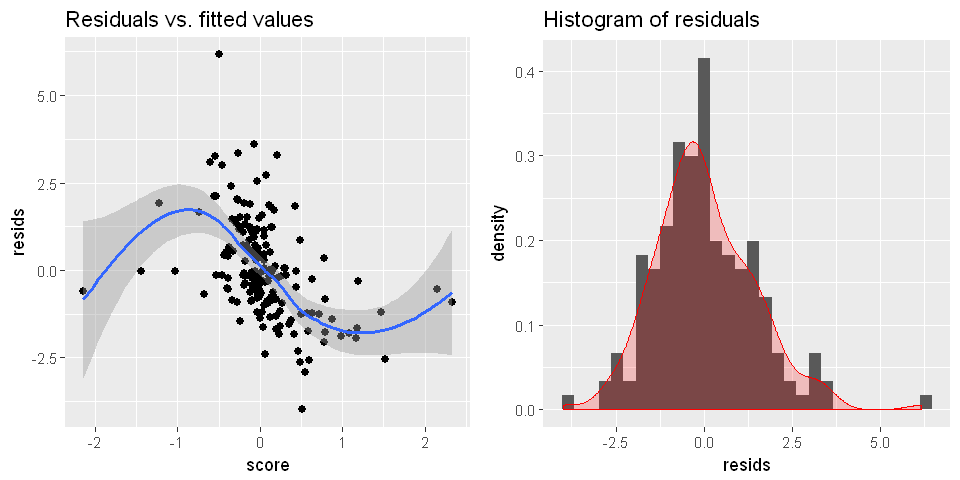

SSE = -154.666311896697 
SSR = 349.660497943208 
SST = 194.994186046512 
RMSE = -0.909801834686451 
Adjusted R^2 = -1.01733225057428 


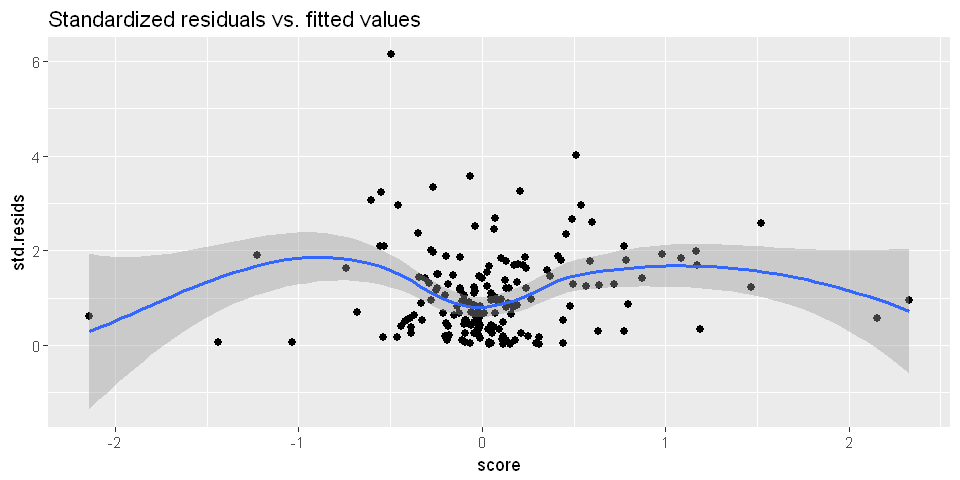

In [113]:
# Apply Singular Value Decomposition using Pseudo Inverse for median pay
# Remove intercept and redundant columns
# Copy dataframe so I can use the same function for both median pay and unemployment rate
df <- numeric_recentgrads
mod.mat <- model.matrix(df$normalized_gradmedian_round ~ . - Median - Rank - 1 -normalized_gradmedian - normalized_gradundemploymentrate - normalized_gradunemployednum - normalized_grademployednum, data = df)
M = as.matrix(mod.mat)
head(M)
MTM = t(M) %*% M
head(MTM)
dim(MTM)
# Examine the singular values and in the process check for "Rank Deficiency".
mSVD <- svd(MTM)
#Validate whether singular vectors are orthogonal.
uOrth <- t(mSVD$u) %*% mSVD$u
vOrth <- mSVD$v %*% t(mSVD$v)
uOrthSingLeftVector <- mSVD$u
vOrthSingRightVector <- mSVD$v
diagSDV <- mSVD$d
diagSDV
#By looking at singlular values we can now deduce that this matrix is rank deficient with 1 value below zero.
# Let us now compute the pseudo inverse of MTM matrix.
#cat('Compute and print the inverse singular value matrix')
d.trim = rep(0, 18)
d.trim[1:17] =1/ mSVD$d[1:17]
mD = diag(d.trim)
#cat('Compute and print the pseudo inverse')
mInv = mSVD$v %*% mD %*% t(mSVD$u)
#cat('Compute and print the dimensions of the matrix MInvM')
MInvM = mInv %*% t(M)
dim(MInvM)

# Compute the vector of model coefficients by multiplying MInvM with normalized median pay.
b <- MInvM %*% df$normalized_gradmedian_round
coeffcountmedian <- nrow(b)

# Now we can evaluate the model using this vector of model coefficient.
df$score = M %*% b + mean(df$normalized_gradmedian_round)
df$resids = df$score - df$normalized_gradmedian_round
require(repr)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
#Calling function for median
plot.svd.reg(df,coeffcountmedian)

# Apply Singular Value Decomposition using Pseudo Inverse for unemployment
# Remove intercept and redundant columns
# Copy dataframe so I can use the same function for both median pay and unemployment rate
df1 <- numeric_recentgrads
mod.mat <- model.matrix(df1$normalized_gradundemploymentrate ~ . - Unemployment_rate - Rank - 1 -normalized_gradmedian - normalized_gradunemployednum - normalized_grademployednum, data = df1)
M = as.matrix(mod.mat)
head(M)
MTM = t(M) %*% M
head(MTM)
dim(MTM)
# Examine the singular values and in the process check for "Rank Deficiency".
mSVD <- svd(MTM)
#Validate whether singular vectors are orthogonal.
uOrth <- t(mSVD$u) %*% mSVD$u
vOrth <- mSVD$v %*% t(mSVD$v)
uOrthSingLeftVector <- mSVD$u
vOrthSingRightVector <- mSVD$v
diagSDV <- mSVD$d
diagSDV
#By looking at singlular values we can now deduce that this matrix is rank deficient with 1 value below zero.
# Let us now compute the pseudo inverse of MTM matrix.
#cat('Compute and print the inverse singular value matrix')
d.trim = rep(0, 19)
d.trim[1:18] =1/ mSVD$d[1:18]
mD = diag(d.trim)
#cat('Compute and print the pseudo inverse')
mInv = mSVD$v %*% mD %*% t(mSVD$u)
#cat('Compute and print the dimensions of the matrix MInvM')
MInvM = mInv %*% t(M)
dim(MInvM)

# Compute the vector of model coefficients by multiplying MInvM with normalized unemployment rate.
b <- MInvM %*% df1$normalized_gradundemploymentrate
coeffcountunemploy <- nrow(b)

# Now we can evaluate the model using this vector of model coefficient.
df1$score = M %*% b + mean(df1$normalized_gradundemploymentrate)
df1$resids = df$score - df1$normalized_gradundemploymentrate
require(repr)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
#Calling function for employment rate
plot.svd.reg(df1,coeffcountunemploy)

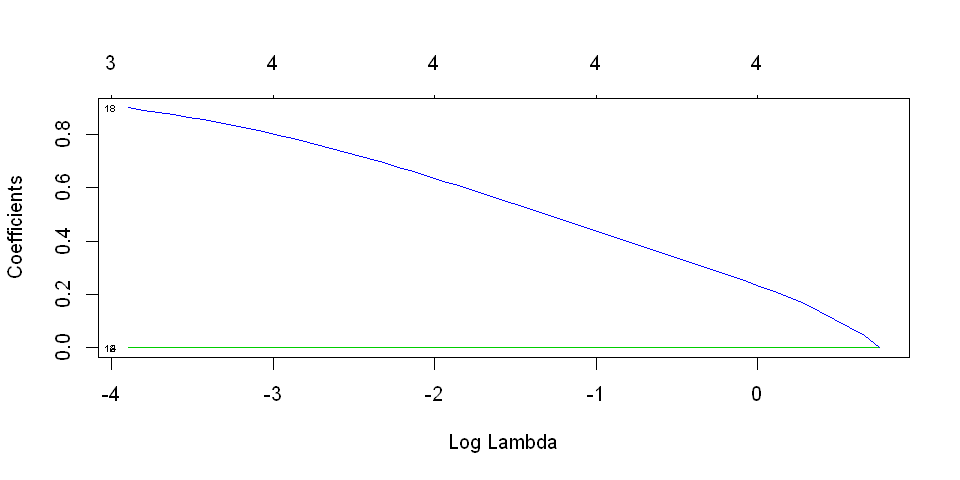

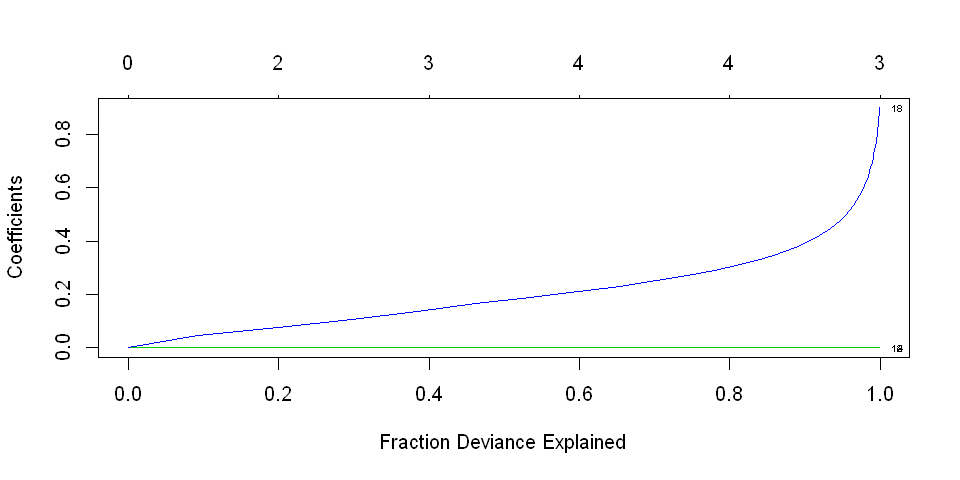

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


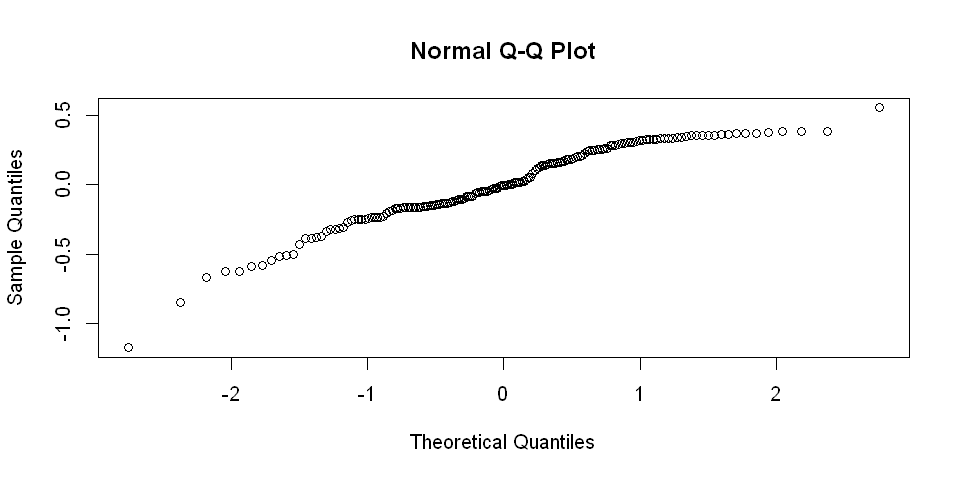

`geom_smooth()` using method = 'loess'


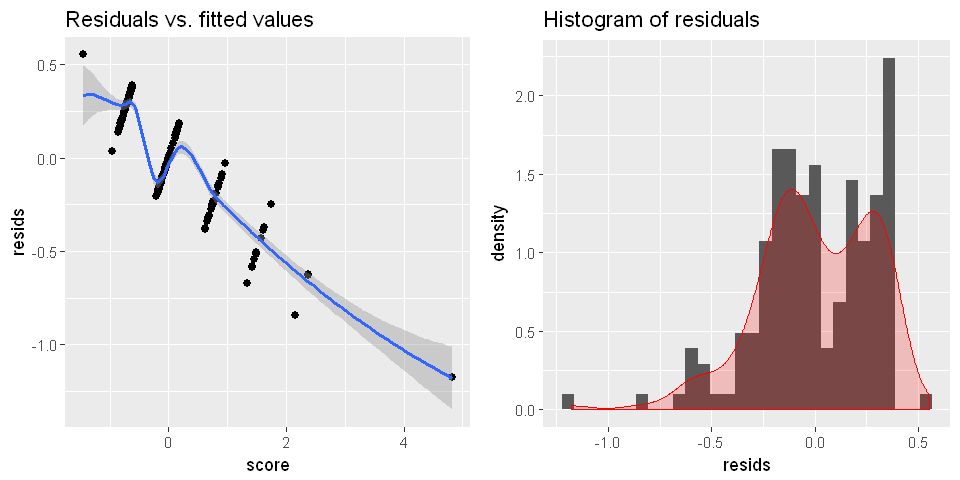

SSE = 181.323208857522 
SSR = 13.6709771889899 
SST = 194.994186046512 
RMSE = 1.0666071109266 
Adjusted R^2 = 0.921642138382149 


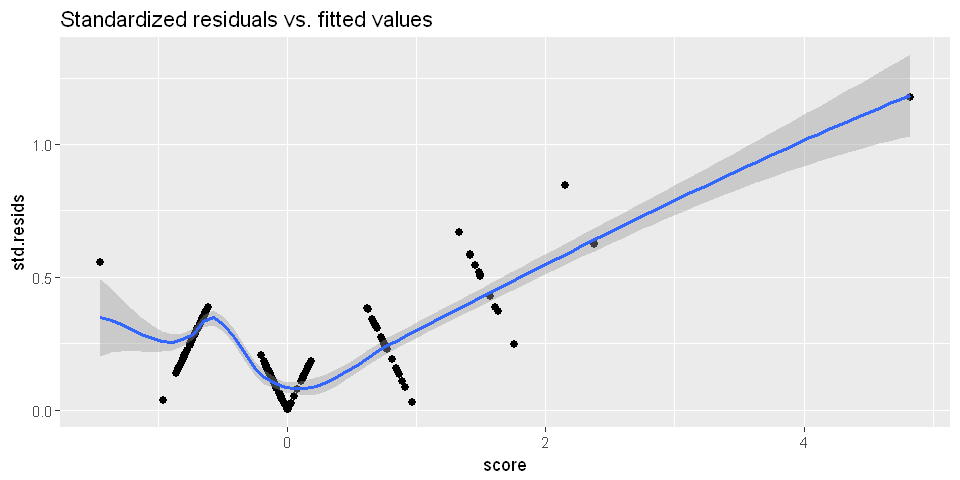

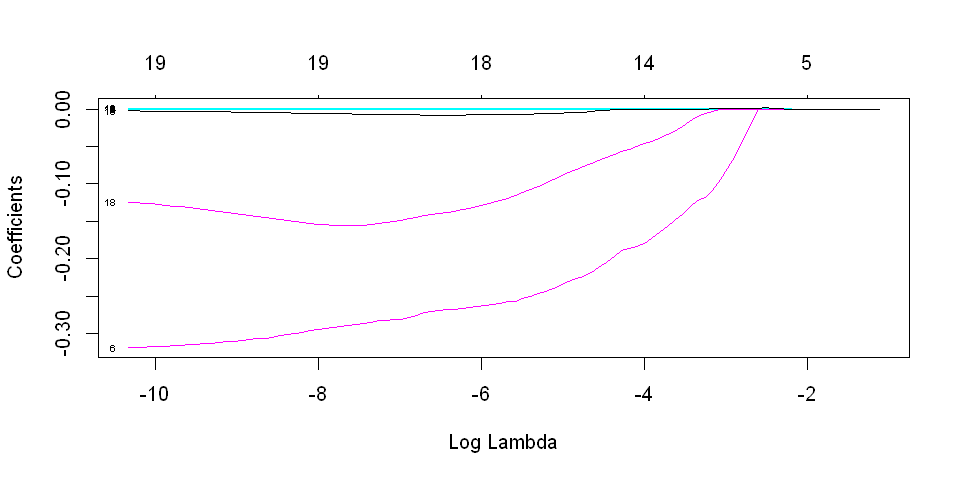

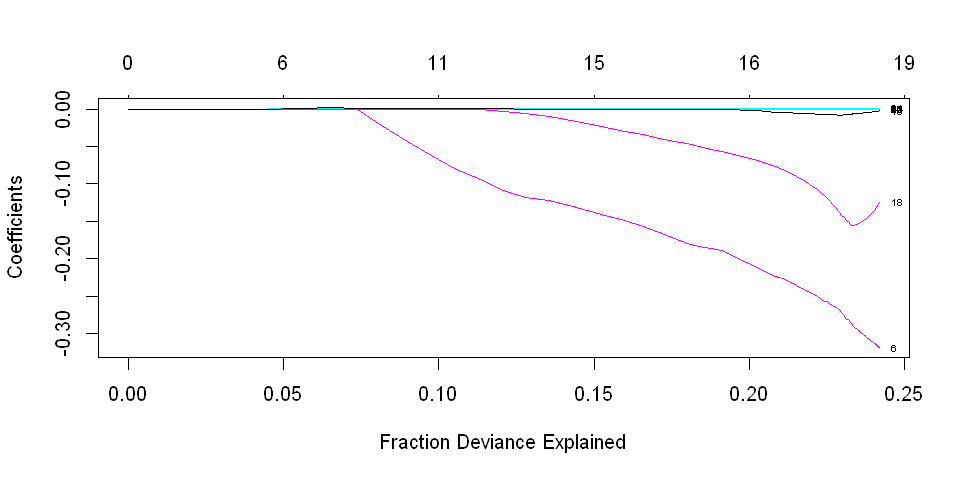

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


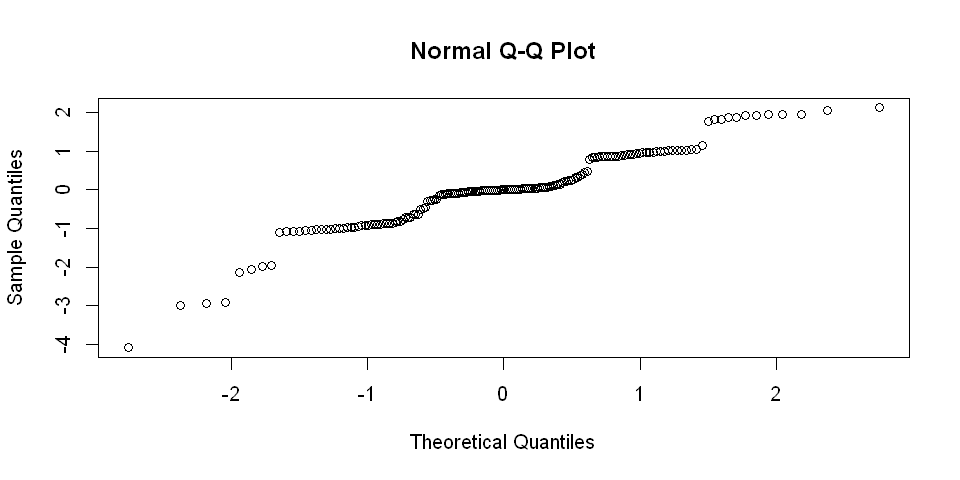

`geom_smooth()` using method = 'loess'


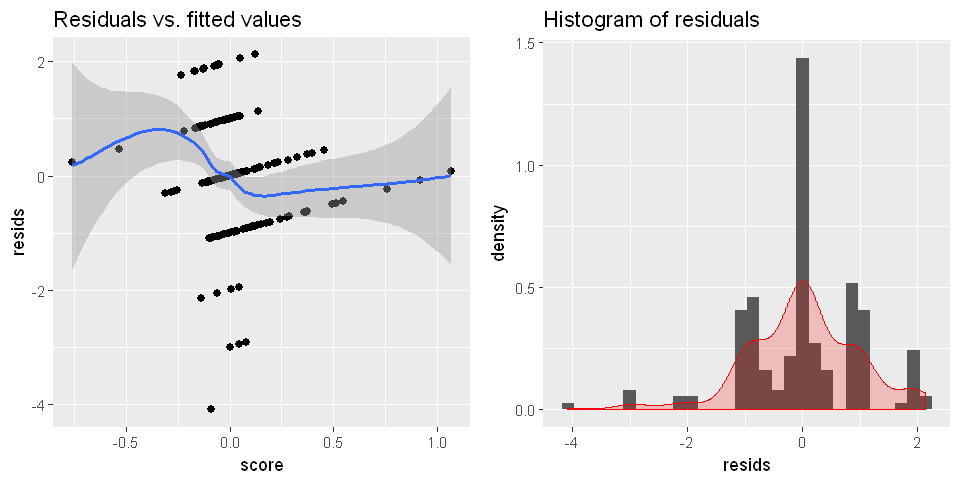

SSE = 26.3879573595162 
SSR = 168.606228686995 
SST = 194.994186046512 
RMSE = 0.15522327858539 
Adjusted R^2 = 0.027242754675643 


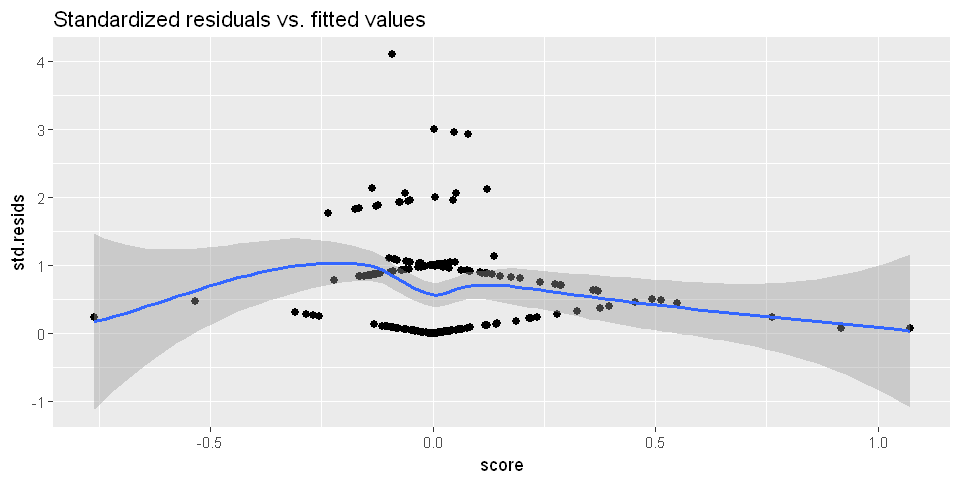

In [114]:
#Elastic Net Regression on median pay
require(glmnet)
b = as.matrix(df$normalized_gradmedian_round)
mod.ridge = glmnet(M, b, family = 'gaussian', nlambda = 100, alpha = .5)
plot(mod.ridge, xvar = 'lambda', label = TRUE)
plot(mod.ridge, xvar = 'dev', label = TRUE)

#Let us now evaluate the model created by elastice net regression by calculating the score using predict function.
df$score = predict(mod.ridge, newx = M)[, 20]
df$resids = df$score - df$normalized_gradmedian_round

plot.svd.reg(df,coeffcountmedian)


#Elastic Net Regression on unemployment
require(glmnet)
b = as.matrix(df1$normalized_gradundemploymentrate)
mod.ridge = glmnet(M, b, family = 'gaussian', nlambda = 100, alpha = .5)
plot(mod.ridge, xvar = 'lambda', label = TRUE)
plot(mod.ridge, xvar = 'dev', label = TRUE)

#Let us now evaluate the model created by elastice net regression by calculating the score using predict function.
df1$score = predict(mod.ridge, newx = M)[, 20]
df1$resids = df1$score - df1$normalized_gradundemploymentrate

plot.svd.reg(df1,coeffcountunemploy)
